In [2436]:
#importing necessary libraries 
import numpy as np
import pandas as pd
import sklearn
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches
%matplotlib inline
import seaborn as sns
import calendar as cal
import plotly as pt
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from pylab import *
import matplotlib.patheffects as PathEffects
import datetime
import matplotlib.cm as cm
import re
from sklearn.decomposition import PCA
from itertools import product
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import RFE

In [2437]:
#read and load the dataset into pandas dataframe
df=pd.read_csv('2021_Crashes.csv')

/var/folders/1x/nd7lrckn6xvg7vd75cjvskvm0000gp/T/ipykernel_560/2639699759.py:2: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('2021_Crashes.csv')


In [2438]:
#checking dataframe types
#checking number of columns and rows in dataframe
print(df.dtypes)
print(type(df))
print('The Dataset Contains, Rows: {:,d} & Columns: {}'.format(df.shape[0], df.shape[1]))

CRASH_NUMB           int64
CITY_TOWN_NAME      object
CRASH_DATE_TEXT     object
CRASH_TIME_2        object
CRASH_DATETIME      object
                    ...   
SHLDR_UL_T          object
SHLDR_UL_W         float64
F_F_CLASS           object
OBJECTID             int64
SHAPE              float64
Length: 116, dtype: object
<class 'pandas.core.frame.DataFrame'>
The Dataset Contains, Rows: 124,711 & Columns: 116


In [2439]:
#looking at dataframe information
df.info()
#setting df to display all columns
pd.set_option('display.max_columns', None)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124711 entries, 0 to 124710
Columns: 116 entries, CRASH_NUMB to SHAPE
dtypes: float64(28), int64(7), object(81)
memory usage: 110.4+ MB


In [2440]:
#identified all columns by index
for n, col in enumerate(df):
   print(n,col)

0 CRASH_NUMB
1 CITY_TOWN_NAME
2 CRASH_DATE_TEXT
3 CRASH_TIME_2
4 CRASH_DATETIME
5 CRASH_HOUR
6 CRASH_STATUS
7 CRASH_SEVERITY_DESCR
8 MAX_INJR_SVRTY_CL
9 NUMB_VEHC
10 NUMB_NONFATAL_INJR
11 NUMB_FATAL_INJR
12 POLC_AGNCY_TYPE_DESCR
13 MANR_COLL_DESCR
14 VEHC_MNVR_ACTN_CL
15 VEHC_TRVL_DIRC_CL
16 VEHC_SEQ_EVENTS_CL
17 AMBNT_LIGHT_DESCR
18 WEATH_COND_DESCR
19 ROAD_SURF_COND_DESCR
20 FIRST_HRMF_EVENT_DESCR
21 MOST_HRMFL_EVT_CL
22 DRVR_CNTRB_CIRC_CL
23 VEHC_CONFIG_CL
24 STREET_NUMB
25 RDWY
26 DIST_DIRC_FROM_INT
27 NEAR_INT_RDWY
28 MM_RTE
29 DIST_DIRC_MILEMARKER
30 MILEMARKER
31 EXIT_RTE
32 DIST_DIRC_EXIT
33 EXIT_NUMB
34 DIST_DIRC_LANDMARK
35 LANDMARK
36 RDWY_JNCT_TYPE_DESCR
37 TRAF_CNTRL_DEVC_TYPE_DESCR
38 TRAFY_DESCR_DESCR
39 JURISDICTN
40 FIRST_HRMF_EVENT_LOC_DESCR
41 NON_MTRST_TYPE_CL
42 NON_MTRST_ACTN_CL
43 NON_MTRST_LOC_CL
44 IS_GEOCODED
45 GEOCODING_METHOD_NAME
46 X
47 Y
48 LAT
49 LON
50 RMV_DOC_IDS
51 CRASH_RPT_IDS
52 YEAR
53 AGE_DRVR_YNGST
54 AGE_DRVR_OLDEST
55 AGE_NONMTRST_YNGST
56 AG

In [2441]:
#creating new dataframe with columns that will be analyzed
mac_df=df.iloc[:,[0,1,3,4,7,8,13,16,17,18,19,20,21,22,46,47,52,53,54,69,97,100,101,106]]

In [2442]:
#generating index list for new dataframe created
for n, col in enumerate(mac_df):
   print(n,col)

0 CRASH_NUMB
1 CITY_TOWN_NAME
2 CRASH_TIME_2
3 CRASH_DATETIME
4 CRASH_SEVERITY_DESCR
5 MAX_INJR_SVRTY_CL
6 MANR_COLL_DESCR
7 VEHC_SEQ_EVENTS_CL
8 AMBNT_LIGHT_DESCR
9 WEATH_COND_DESCR
10 ROAD_SURF_COND_DESCR
11 FIRST_HRMF_EVENT_DESCR
12 MOST_HRMFL_EVT_CL
13 DRVR_CNTRB_CIRC_CL
14 X
15 Y
16 YEAR
17 AGE_DRVR_YNGST
18 AGE_DRVR_OLDEST
19 SPEED_LIMIT
20 OPERATION
21 SPEED_LIM
22 STREETNAME
23 TERRAIN


<font size="16">BEGINNING TO CLEAN DATA</font>

In [2443]:
#looking at nulls values in each column
mac_df.isnull().sum()

CRASH_NUMB                    0
CITY_TOWN_NAME                0
CRASH_TIME_2                 34
CRASH_DATETIME               34
CRASH_SEVERITY_DESCR          0
MAX_INJR_SVRTY_CL            17
MANR_COLL_DESCR               0
VEHC_SEQ_EVENTS_CL          952
AMBNT_LIGHT_DESCR             0
WEATH_COND_DESCR              0
ROAD_SURF_COND_DESCR          0
FIRST_HRMF_EVENT_DESCR        0
MOST_HRMFL_EVT_CL          1168
DRVR_CNTRB_CIRC_CL         6964
X                          5489
Y                          5489
YEAR                          0
AGE_DRVR_YNGST             5904
AGE_DRVR_OLDEST            5901
SPEED_LIMIT               10857
OPERATION                  3686
SPEED_LIM                 23624
STREETNAME                 2868
TERRAIN                    3801
dtype: int64

In [2444]:
#counting total null values
mac_df.isnull().sum().sum()

76788

In [2445]:
#checking to see % of dataframe that has missing values
(mac_df.isnull().sum().sum()/mac_df.size)*100

2.5655315088484576

In [2446]:
#checking to see % of dataframe that has missing values
missing_values = mac_df.isnull().sum().sum()
total_values = mac_df.size

print('The MA crash 2021 dataset has {0} missing values out of {1} which corresponds to {2}%'\
      .format(missing_values, total_values,100*missing_values/total_values))

The MA crash 2021 dataset has 76788 missing values out of 2993064 which corresponds to 2.5655315088484576%


In [2447]:
#replacing NaN values of Speed limit with values in speed lim
mac_df['SPEED_LIMIT'] = mac_df['SPEED_LIMIT'].fillna(mac_df['SPEED_LIM'])

In [2448]:
#checking how many nan values were replaced with int
#roughly 8k values were replaced!
mac_df.isnull().sum()

CRASH_NUMB                    0
CITY_TOWN_NAME                0
CRASH_TIME_2                 34
CRASH_DATETIME               34
CRASH_SEVERITY_DESCR          0
MAX_INJR_SVRTY_CL            17
MANR_COLL_DESCR               0
VEHC_SEQ_EVENTS_CL          952
AMBNT_LIGHT_DESCR             0
WEATH_COND_DESCR              0
ROAD_SURF_COND_DESCR          0
FIRST_HRMF_EVENT_DESCR        0
MOST_HRMFL_EVT_CL          1168
DRVR_CNTRB_CIRC_CL         6964
X                          5489
Y                          5489
YEAR                          0
AGE_DRVR_YNGST             5904
AGE_DRVR_OLDEST            5901
SPEED_LIMIT                2664
OPERATION                  3686
SPEED_LIM                 23624
STREETNAME                 2868
TERRAIN                    3801
dtype: int64

In [2449]:
#removing column speed lim from dataframe after merging it with speed limit
mac_df=mac_df.drop(['SPEED_LIM'], axis=1)

In [2450]:
#dropping na values from rows and columns
cleaned_on_row=mac_df.dropna(axis=0)
cleaned_on_column = mac_df.dropna(axis=1)

#looking at original and selected columns dataframe
print('original data dimensions',df.shape)
print('selected data dimensions',mac_df.shape)

#looking at dataframe if cleaned by columns vs rows
print('cleaned by column data dimensions',cleaned_on_column.shape)
print('cleaned by row data dimensions',cleaned_on_row.shape)

#returning the first null function in the first (x) rows in all the columns
mac_df[mac_df.isna().any(axis=1)].head(5)

original data dimensions (124711, 116)
selected data dimensions (124711, 23)
cleaned by column data dimensions (124711, 9)
cleaned by row data dimensions (105477, 23)


,CRASH_NUMB,CITY_TOWN_NAME,CRASH_TIME_2,CRASH_DATETIME,CRASH_SEVERITY_DESCR,MAX_INJR_SVRTY_CL,MANR_COLL_DESCR,VEHC_SEQ_EVENTS_CL,AMBNT_LIGHT_DESCR,WEATH_COND_DESCR,ROAD_SURF_COND_DESCR,FIRST_HRMF_EVENT_DESCR,MOST_HRMFL_EVT_CL,DRVR_CNTRB_CIRC_CL,X,Y,YEAR,AGE_DRVR_YNGST,AGE_DRVR_OLDEST,SPEED_LIMIT,OPERATION,STREETNAME,TERRAIN
4,4915242,AVON,10:43:00,2021/01/01 22:43:00+00,Not Reported,Not reported,Unknown,NaN,Unknown,Unknown/Other,Unknown,Unknown,V1:(Unknown),NaN,237259.402518,875937.762557,2021,NaN,NaN,10.0,Two-way traffic,PAGE STREET,Level Terrain
13,4915121,NORTH ATTLEBOROUGH,02:58:00,2021/01/02 14:58:00+00,Non-fatal injury,Possible Injury (C),Rear-end,V1:(Collision with motor vehicle in traffic) ...,Daylight,Clear,Dry,Collision with motor vehicle in traffic,V1:(Collision with motor vehicle in traffic) /...,D1: (Inattention) / D2: (No improper driving)...,NaN,NaN,2021,16-17,45-54,40.0,NaN,NaN,NaN
14,4915103,BOSTON,07:38:00,2021/01/02 19:38:00+00,Property damage only (none injured),No Apparent Injury (O),Single vehicle crash,"V1:(Ran off road right),(Collision with guard...",Dark - lighted roadway,Cloudy,"Sand, mud, dirt, oil, gravel",Collision with guardrail,V1:(Collision with guardrail),D1: (No improper driving),NaN,NaN,2021,45-54,45-54,55.0,Two-way traffic,NaN,Level Terrain
25,4915092,CHICOPEE,10:25:00,2021/01/01 22:25:00+00,Property damage only (none injured),No Apparent Injury (O),Single vehicle crash,V1:(Collision with median barrier),Dark - lighted roadway,Snow,Wet,Collision with median barrier,V1:(Collision with median barrier),D1: (Driving too fast for conditions),NaN,NaN,2021,21-24,21-24,50.0,Two-way traffic,INTERSTATE 91,Level Terrain
28,4915089,BEDFORD,11:22:00,2021/01/01 23:22:00+00,Property damage only (none injured),No Apparent Injury (O),Single vehicle crash,"V1:(Collision with motor vehicle in traffic),...",Dusk,Not Reported,Snow,Collision with motor vehicle in traffic,V1:(Collision with motor vehicle in traffic),D1: (Driving too fast for conditions),NaN,NaN,2021,25-34,25-34,55.0,Two-way traffic,ROUTE 3,Level Terrain


In [2451]:
#checking % of missing values in this new dataframe
(mac_df.isnull().sum().sum()/mac_df.size)*100

1.5678335267660568

In [2452]:
#cleaning mac_df by removing rows with nulls
mac_df=cleaned_on_row

#checking to see if dataset is clean
mac_df.isnull().sum()

CRASH_NUMB                0
CITY_TOWN_NAME            0
CRASH_TIME_2              0
CRASH_DATETIME            0
CRASH_SEVERITY_DESCR      0
MAX_INJR_SVRTY_CL         0
MANR_COLL_DESCR           0
VEHC_SEQ_EVENTS_CL        0
AMBNT_LIGHT_DESCR         0
WEATH_COND_DESCR          0
ROAD_SURF_COND_DESCR      0
FIRST_HRMF_EVENT_DESCR    0
MOST_HRMFL_EVT_CL         0
DRVR_CNTRB_CIRC_CL        0
X                         0
Y                         0
YEAR                      0
AGE_DRVR_YNGST            0
AGE_DRVR_OLDEST           0
SPEED_LIMIT               0
OPERATION                 0
STREETNAME                0
TERRAIN                   0
dtype: int64

In [2453]:
#looking at data types of the new dataframe
print(mac_df.dtypes)

CRASH_NUMB                  int64
CITY_TOWN_NAME             object
CRASH_TIME_2               object
CRASH_DATETIME             object
CRASH_SEVERITY_DESCR       object
MAX_INJR_SVRTY_CL          object
MANR_COLL_DESCR            object
VEHC_SEQ_EVENTS_CL         object
AMBNT_LIGHT_DESCR          object
WEATH_COND_DESCR           object
ROAD_SURF_COND_DESCR       object
FIRST_HRMF_EVENT_DESCR     object
MOST_HRMFL_EVT_CL          object
DRVR_CNTRB_CIRC_CL         object
X                         float64
Y                         float64
YEAR                        int64
AGE_DRVR_YNGST             object
AGE_DRVR_OLDEST            object
SPEED_LIMIT               float64
OPERATION                  object
STREETNAME                 object
TERRAIN                    object
dtype: object


In [2454]:
#changing datatype of speed limit from float to int 
mac_df=mac_df.astype({'SPEED_LIMIT':'int'})

#checking changes made
print(mac_df.dtypes)

CRASH_NUMB                  int64
CITY_TOWN_NAME             object
CRASH_TIME_2               object
CRASH_DATETIME             object
CRASH_SEVERITY_DESCR       object
MAX_INJR_SVRTY_CL          object
MANR_COLL_DESCR            object
VEHC_SEQ_EVENTS_CL         object
AMBNT_LIGHT_DESCR          object
WEATH_COND_DESCR           object
ROAD_SURF_COND_DESCR       object
FIRST_HRMF_EVENT_DESCR     object
MOST_HRMFL_EVT_CL          object
DRVR_CNTRB_CIRC_CL         object
X                         float64
Y                         float64
YEAR                        int64
AGE_DRVR_YNGST             object
AGE_DRVR_OLDEST            object
SPEED_LIMIT                 int64
OPERATION                  object
STREETNAME                 object
TERRAIN                    object
dtype: object


In [2455]:
#setting pandas to display 100 rows of the dataframe
pd.set_option('display.max_rows', 100)

In [2456]:
mac_df.describe()

,CRASH_NUMB,X,Y,YEAR,SPEED_LIMIT
count,1.054770e+05,105477.000000,105477.000000,105477.0,105477.000000
mean,4.993467e+06,207224.423552,886428.290497,2021.0,35.401756
std,4.215662e+04,52094.479128,32983.542850,0.0,14.848242
min,4.914862e+06,36533.846609,779336.528149,2021.0,0.000000
25%,4.959179e+06,180039.955235,869768.437100,2021.0,30.000000
50%,4.993330e+06,225419.006300,888437.184000,2021.0,30.000000
75%,5.027563e+06,239220.454000,909857.125762,2021.0,40.000000
max,5.175900e+06,329169.406500,959299.003200,2021.0,665.000000


In [2457]:
mac_df.sort_values("ROAD_SURF_COND_DESCR", ascending=False).head(5)

,CRASH_NUMB,CITY_TOWN_NAME,CRASH_TIME_2,CRASH_DATETIME,CRASH_SEVERITY_DESCR,MAX_INJR_SVRTY_CL,MANR_COLL_DESCR,VEHC_SEQ_EVENTS_CL,AMBNT_LIGHT_DESCR,WEATH_COND_DESCR,ROAD_SURF_COND_DESCR,FIRST_HRMF_EVENT_DESCR,MOST_HRMFL_EVT_CL,DRVR_CNTRB_CIRC_CL,X,Y,YEAR,AGE_DRVR_YNGST,AGE_DRVR_OLDEST,SPEED_LIMIT,OPERATION,STREETNAME,TERRAIN
62390,4993750,TAUNTON,08:18:00,2021/08/05 20:18:00+00,Property damage only (none injured),No Apparent Injury (O),Rear-end,V1:(Collision with motor vehicle in traffic) ...,Dark - lighted roadway,Rain,Wet,Collision with motor vehicle in traffic,V1:(Collision with motor vehicle in traffic) /...,D1: (Failure to keep in proper lane or running...,232350.250300,850818.500200,2021,21-24,21-24,35,Two-way traffic,TREMONT STREET,Level Terrain
25125,4951860,WOBURN,12:29:00,2021/04/16 12:29:00+00,Property damage only (none injured),No Apparent Injury (O),Rear-end,V1:(Collision with motor vehicle in traffic) ...,Daylight,Rain/Snow,Wet,Collision with motor vehicle in traffic,V1:(Collision with motor vehicle in traffic) /...,D1: (No improper driving) / D2: (Unknown),227859.575003,918523.983389,2021,25-34,35-44,30,Two-way traffic,MAIN STREET,Level Terrain
25136,4951817,WEST BRIDGEWATER,02:10:00,2021/04/12 14:10:00+00,Property damage only (none injured),No Apparent Injury (O),Angle,V1:(Collision with motor vehicle in traffic) ...,Daylight,Cloudy/Rain,Wet,Collision with motor vehicle in traffic,V1:(Collision with motor vehicle in traffic) /...,D1: (Made an improper turn) / D2: (No imprope...,237246.804300,862518.366300,2021,45-54,55-64,25,Two-way traffic,WEST CENTER STREET,Level Terrain
81097,5013516,BROCKTON,05:46:00,2021/07/17 17:46:00+00,Non-fatal injury,Possible Injury (C),Front to Rear,V1:(Collision with motor vehicle in traffic) ...,Daylight,Clear,Wet,Collision with motor vehicle in traffic,V1:(Collision with motor vehicle in traffic) /...,D1: (Followed too closely) / D2: (No improper...,237052.261300,871270.963100,2021,21-24,45-54,40,Two-way traffic,REYNOLDS HIGHWAY,Level Terrain
25133,4951820,WEST BRIDGEWATER,08:06:00,2021/04/16 08:06:00+00,Property damage only (none injured),No Apparent Injury (O),"Sideswipe, same direction",V1:(Collision with motor vehicle in traffic) ...,Daylight,Rain,Wet,Collision with motor vehicle in traffic,V1:(Collision with motor vehicle in traffic) /...,D1: (Unknown) / D2: (No improper driving),238237.628085,862882.067226,2021,16-17,18-20,35,Two-way traffic,WEST CENTER STREET,Level Terrain


In [2458]:
#nondry_df=mac_df.drop(mac_df.loc[mac_df['ROAD_SURF_COND_DESCR']=='Dry'].index, inplace=True)

In [2459]:
#filtering out all the accidents that occured with altered road conditoins
lowfriction_df=mac_df.loc[mac_df['ROAD_SURF_COND_DESCR']!="Dry"]

In [2460]:
#filtering out all the accidents that occured during normal road conditions
highfriction_df=mac_df.loc[mac_df['ROAD_SURF_COND_DESCR']=="Dry"]

In [2461]:
#mac_df.groupby('CITY_TOWN_NAME')['CRASH_NUMB'].count().plot(kind='barh',figsize=(20,50))

In [2462]:
#lowfriction_df.groupby('CITY_TOWN_NAME')['CRASH_NUMB'].count().plot(kind='barh',figsize=(20,50))

copying a bunch of cities off of the https://www.mass.gov/locations/highway-district-1-office

then saving it as a text file, opening it here, so i can add commas and change it to a list in order to print, then save the list as a dictionary in another notebook

showing only district 5 to save space on notebook

In [2463]:
from pathlib import Path
file=Path.cwd()/"districts.txt"

with open(file,'r') as text:
    textfile=text.read()
    print(textfile)

ABINGTON ACUSHNET AQUINNAH ATTLEBORO BARNSTABLE	BERKLEY	BOURNE BREWSTER BROCKTON CARVER CHATHAM CHILMARK DARTMOUTH DENNIS DIGHTON DUXBURY EASTHAM EASTON EDGARTOWN FAIRHAVEN FALMOUTH FOXBOROUGH FREETOWN GOSNOLD HANOVER HANSON HARWICH HINGHAM HULL KINGSTON LAKEVILLE	MANSFIELD MARSHFIELD MASHPEE MATTAPOISETT MIDDLEBOROUGH NEW BEDFORD NORFOLK NORTH ATTLEBORO NORTON NORWOOD OAK BLUFFS ORLEANS PEMBROKE PLYMOUTH PLYMPTON PROVINCETOWN RAYNHAM ROCHESTER ROCKLAND SANDWICH SCITUATE SHARON SOMERSET STOUGHTON SWANSEA TISBURY TRURO WALPOLE WAREHAM WEST BRIDGEWATER WEST TISBURY WESTPORT WHITMAN
YARMOUTH	 		



In [2464]:
type(textfile)

str

In [2465]:
#splitting the strings into a list of strings
x=textfile.split(' ')
print(x)

['ABINGTON', 'ACUSHNET', 'AQUINNAH', 'ATTLEBORO', 'BARNSTABLE\tBERKLEY\tBOURNE', 'BREWSTER', 'BROCKTON', 'CARVER', 'CHATHAM', 'CHILMARK', 'DARTMOUTH', 'DENNIS', 'DIGHTON', 'DUXBURY', 'EASTHAM', 'EASTON', 'EDGARTOWN', 'FAIRHAVEN', 'FALMOUTH', 'FOXBOROUGH', 'FREETOWN', 'GOSNOLD', 'HANOVER', 'HANSON', 'HARWICH', 'HINGHAM', 'HULL', 'KINGSTON', 'LAKEVILLE\tMANSFIELD', 'MARSHFIELD', 'MASHPEE', 'MATTAPOISETT', 'MIDDLEBOROUGH', 'NEW', 'BEDFORD', 'NORFOLK', 'NORTH', 'ATTLEBORO', 'NORTON', 'NORWOOD', 'OAK', 'BLUFFS', 'ORLEANS', 'PEMBROKE', 'PLYMOUTH', 'PLYMPTON', 'PROVINCETOWN', 'RAYNHAM', 'ROCHESTER', 'ROCKLAND', 'SANDWICH', 'SCITUATE', 'SHARON', 'SOMERSET', 'STOUGHTON', 'SWANSEA', 'TISBURY', 'TRURO', 'WALPOLE', 'WAREHAM', 'WEST', 'BRIDGEWATER', 'WEST', 'TISBURY', 'WESTPORT', 'WHITMAN\nYARMOUTH\t', '\t\t\n']


In [2466]:
#checking for type again
type(x)

list

In [2467]:
#creating a dictionary of the districs
#first found listing of all the cities and towns of each district
#copied the data into word doc and capitalized all letters
#copied the capitalized letters into a text file, then loaded them in a new notebook
#then added commas to spit the string by word, then converted the string to a list 

districts={
    'D1':['ADAMS','ALFORD','ASHFIELD','BECKET','BLANDFORD','BUCKLAND','CHARLEMONT',
          'CHESHIRE','CHESTER','CHESTERFIELD','CLARKSBURG','COLRAIN','CONWAY',
          'CUMMINGTON','DALTON','EGREMONT','FLORIDA','GOSHEN','GRANVILLE',
          'GREAT BARRINGTON','HANCOCK','HAWLEY','HEATH','HINSDALE','HUNTINGTON',
          'LANESBOROUGH','LEE','LENOX','MIDDLEFIELD','MONROE','MONTEREY','MONTGOMERY',
          'MOUNT WASHINGTON','NEW ASHFORD','NEW MARLBOROUGH','NORTH ADAMS','OTIS',
          'PERU','PITTSFIELD','PLAINFIELD','RICHMOND','ROWE','RUSSELL','SANDISFIELD',
          'SAVOY','SHEFFIELD','SHELBURNE','STOCKBRIDGE','TOLLAND','TYRINGHAM',
          'WASHINGTON','WEST STOCKBRIDGE','WILLIAMSBURG','WILLIAMSTOWN','WINDSOR',
          'WORTHINGTON'],

   'D2':['AGAWAM','AMHERST','ATHOL','BERNARDSTON','BRIMFIELD','CHICOPEE','EASTHAMPTON',
         'ERVING','GILL','HADLEY','HAMPDEN','HARDWICK','HOLYOKE','LEVERETT','LEYDEN',
         'MONSON','MONTAGUE','NEW BRAINTREE','NORTHFIELD','ORANGE','PALMER','PHILLIPSTON',
         'ROYALSTON','SHUTESBURY','SOUTHWICK','SPRINGFIELD','SUNDERLAND','WARE',
         'WARREN','WARWICK','WEST SPRINGFIELD','WESTFIELD','WESTHAMPTON','WINCHENDON','LUDLOW',
         'GREENFIELD','LONGMEADOW','EAST LONGMEADOW','WILBRAHAM','BELCHERTOWN','GRANBY','DEERFIELD',
         'HOLLAND','WENDELL','PELHAM','PETERSHAM','WALES','NEW SALEM', 'WEST BROOKFIELD', 'BARRE',
         'HATFIELD', 'WHATLEY', 'SOUTHAMPTON', 'TEMPLETON','SOUTH HADLEY','NORTHAMPTON','WHATLEY'],
   
    'D3':['ACTON','ASHBURNHAM','ASHBY','ASHLAND','AUBURN','AYER','BELLINGHAM','BERLIN',
          'BLACKSTONE','BOLTON','BOXBOROUGH','BOYLSTON','BROOKFIELD','CHARLTON','CLINTON',
          'DOUGLAS','DUDLEY','DUNSTABLE','EAST','BROOKFIELD','FITCHBURG','FRAMINGHAM',
          'FRANKLIN','GARDNER','GRAFTON','GROTON','HARVARD','HOLDEN','HOLLISTON','HOPEDALE',
          'HOPKINTON','HUBBARDSTON','HUDSON','LANCASTER','LEICESTER','LEOMINSTER',
          'LITTLETON','LUNENBERG','MARLBOROUGH','MAYNARD','MEDFIELD','MEDWAY','MENDON',
          'MILFORD','MILLBURY','MILLIS','MILLVILLE','NATICK','NORTH BROOKFIELD',
          'NORTHBOROUGH','NORTHBRIDGE','OAKHAM','OXFORD','PAXTON','PEPPERELL','PRINCETON',
          'RUTLAND','SHERBORN','SHIRLEY','SHREWSBURY','SOUTHBOROUGH','SOUTHBRIDGE',
          'SPENCER','STERLING','STOW','STURBRIDGE','SUDBURY','SUTTON','TOWNSEND','UPTON',
          'UXBRIDGE','WAYLAND','WEBSTER','WEST BOYLSTON','WESTBOROUGH','WESTFORD',
          'WESTMINSTER','WORCESTER','LUNENBURG','EAST BROOKFIELD'],
    
   'D4':['AMESBURY','ANDOVER','ARLINGTON','BEDFORD','BELMONT','BEVERLY','BILLERICA',
         'BOXFORD','BURLINGTON','CARLISLE','CHELMSFORD','CONCORD','DANVERS','DRACUT',
         'ESSEX','EVERETT','GEORGETOWN','GLOUCESTER','GROVELAND','HAMILTON','HAVERHILL',
         'IPSWICH','LAWRENCE','LEXINGTON','LINCOLN','LOWELL','LYNN','LYNNFIELD','MALDEN',
         'MANCHESTER BY THE SEA','MARBLEHEAD','MEDFORD','MELROSE','MERRIMAC','METHUEN',
         'MIDDLETON','NAHANT','NEWBURY','NEWBURYPORT','NORTH ANDOVER','NORTH READING',
         'PEABODY','READING','REVERE','ROCKPORT','ROWLEY','SALEM','SALISBURY','SAUGUS',
         'SOMERVILLE','STONEHAM','SWAMPSCOTT','TEWKSBURY','TOPSFIELD','TYNGSBOROUGH'
         'WAKEFIELD','WALTHAM','WENHAM','WEST NEWBURY','WILMINGTON','WINCHESTER','WOBURN','WAKEFIELD',
         'TYNGSBOROUGH','MANCHESTER',],
   
    'D5':['ABINGTON','ACUSHNET','AQUINNAH', 'ATTLEBORO', 'BARNSTABLE','BERKLEY','BOURNE',
         'BREWSTER', 'BROCKTON', 'CARVER', 'CHATHAM', 'CHILMARK', 'DARTMOUTH', 'DENNIS',
         'DIGHTON', 'DUXBURY', 'EASTHAM', 'EASTON', 'EDGARTOWN', 'FAIRHAVEN', 'FALMOUTH',
         'FOXBOROUGH', 'FREETOWN', 'GOSNOLD', 'HANOVER', 'HANSON', 'HARWICH', 'HINGHAM',
         'HULL', 'KINGSTON', 'LAKEVILLE','MANSFIELD', 'MARSHFIELD', 'MASHPEE', 
         'MATTAPOISETT', 'MIDDLEBOROUGH', 'NEW BEDFORD', 'NORFOLK', 'NORTH ATTLEBORO', 
         'NORTON', 'NORWELL','NORTH ATTLEBOROUGH','NORWOOD', 'OAK BLUFFS', 'ORLEANS', 'PEMBROKE', 'PLYMOUTH', 'PLYMPTON',
         'PROVINCETOWN', 'RAYNHAM', 'ROCHESTER', 'ROCKLAND', 'SANDWICH', 'SCITUATE', 
         'SHARON', 'SEEKONK', 'SOMERSET', 'STOUGHTON', 'SWANSEA', 'TAUNTON','TISBURY', 'TRURO', 'WALPOLE', 
         'WAREHAM', 'WEST BRIDGEWATER', 'WEST TISBURY', 'WESTPORT', 'WHITMAN','YARMOUTH','BRIDGEWATER'
         'EAST BRIDGEWATER','WRENTHAM','REHOBOTH','AVON', 'HOLBROOK','PLAINVILLE','MARION','COHASSET',
         'AQUINNAH','WELLFLEET','NANTUCKET','HALIFAX','FALL RIVER'],
  
    'D6':['BOSTON', 'BRAINTREE', 'BROOKLINE', 'CAMBRIDGE', 'CANTON', 'CHELSEA', 
         'DEDHAM', 'DOVER', 'MILTON', 'NEEDHAM', 'NEWTON', 'QUINCY', 'RANDOLPH', 
         'WATERTOWN', 'WELLESLEY', 'WESTON', 'WESTWOOD', 'WEYMOUTH', 'WINTHROP']}

In [2468]:
#assigning a city/town to the proper disctrict
d = {val:key for key, lst in districts.items() for val in lst}
mac_df['DISTRICT'] = df.CITY_TOWN_NAME.map(d)

In [2469]:
#reading excel file where i copied ma cities/towns and their corresponding population
#utilized excel (UPPER) function to make all the cities capitalized
import pandas as pd
mapop=pd.read_excel('MAcitypopulation.xlsx')
print(mapop)

            Name         CITY     POP
0       Abington     ABINGTON   17062
1          Acton        ACTON   24021
2       Acushnet     ACUSHNET   10559
3          Adams        ADAMS    8166
4         Agawam       AGAWAM   28692
..           ...          ...     ...
346       Woburn       WOBURN   40876
347    Worcester    WORCESTER  206518
348  Worthington  WORTHINGTON    1193
349     Wrentham     WRENTHAM   12178
350     Yarmouth     YARMOUTH   25023

[351 rows x 3 columns]


In [2470]:
#converting dataframe to dictionary using city and pop columns only
zip(mapop.CITY,mapop.POP)

In [2471]:
type(zip(mapop.CITY,mapop.POP))

zip

In [2472]:
list(zip(mapop.CITY,mapop.POP))

[('ABINGTON', 17062),
 ('ACTON', 24021),
 ('ACUSHNET', 10559),
 ('ADAMS', 8166),
 ('AGAWAM', 28692),
 ('ALFORD', 486),
 ('AMESBURY', 17366),
 ('AMHERST', 39263),
 ('ANDOVER', 36569),
 ('AQUINNAH', 439),
 ('ARLINGTON', 46308),
 ('ASHBURNHAM', 6315),
 ('ASHBY', 3193),
 ('ASHFIELD', 1695),
 ('ASHLAND', 18832),
 ('ATHOL', 11945),
 ('ATTLEBORO', 46461),
 ('AUBURN', 16889),
 ('AVON', 4777),
 ('AYER', 8479),
 ('BARNSTABLE', 48916),
 ('BARRE', 5530),
 ('BECKET', 1931),
 ('BEDFORD', 14383),
 ('BELCHERTOWN', 15350),
 ('BELLINGHAM', 16945),
 ('BELMONT', 27295),
 ('BERKLEY', 6764),
 ('BERLIN', 3158),
 ('BERNARDSTON', 2102),
 ('BEVERLY', 42670),
 ('BILLERICA', 42119),
 ('BLACKSTONE', 9208),
 ('BLANDFORD', 1215),
 ('BOLTON', 5665),
 ('BOSTON', 675647),
 ('BOURNE', 20452),
 ('BOXBOROUGH', 5506),
 ('BOXFORD', 8203),
 ('BOYLSTON', 4849),
 ('BRAINTREE', 39143),
 ('BREWSTER', 10318),
 ('BRIDGEWATER', 28633),
 ('BRIMFIELD', 3694),
 ('BROCKTON', 105643),
 ('BROOKFIELD', 3439),
 ('BROOKLINE', 63191),
 ('BUC

In [2473]:
#pd.Series(df.POP.values,index=df.CITY).to_dict()

#also can be done by:

mapop=mapop.set_index('CITY').to_dict()['POP']

In [2474]:
mapop

{'ABINGTON': 17062,
 'ACTON': 24021,
 'ACUSHNET': 10559,
 'ADAMS': 8166,
 'AGAWAM': 28692,
 'ALFORD': 486,
 'AMESBURY': 17366,
 'AMHERST': 39263,
 'ANDOVER': 36569,
 'AQUINNAH': 439,
 'ARLINGTON': 46308,
 'ASHBURNHAM': 6315,
 'ASHBY': 3193,
 'ASHFIELD': 1695,
 'ASHLAND': 18832,
 'ATHOL': 11945,
 'ATTLEBORO': 46461,
 'AUBURN': 16889,
 'AVON': 4777,
 'AYER': 8479,
 'BARNSTABLE': 48916,
 'BARRE': 5530,
 'BECKET': 1931,
 'BEDFORD': 14383,
 'BELCHERTOWN': 15350,
 'BELLINGHAM': 16945,
 'BELMONT': 27295,
 'BERKLEY': 6764,
 'BERLIN': 3158,
 'BERNARDSTON': 2102,
 'BEVERLY': 42670,
 'BILLERICA': 42119,
 'BLACKSTONE': 9208,
 'BLANDFORD': 1215,
 'BOLTON': 5665,
 'BOSTON': 675647,
 'BOURNE': 20452,
 'BOXBOROUGH': 5506,
 'BOXFORD': 8203,
 'BOYLSTON': 4849,
 'BRAINTREE': 39143,
 'BREWSTER': 10318,
 'BRIDGEWATER': 28633,
 'BRIMFIELD': 3694,
 'BROCKTON': 105643,
 'BROOKFIELD': 3439,
 'BROOKLINE': 63191,
 'BUCKLAND': 1816,
 'BURLINGTON': 26377,
 'CAMBRIDGE': 118403,
 'CANTON': 24370,
 'CARLISLE': 5237,


In [2475]:
#checking how many cities in MA
len(mapop)

351

In [2476]:
#the amount of cities/towns that had a mva in 2020
#this means that 6 cities/towns did NOT have a mva in 2020
len(pd.unique(mac_df['CITY_TOWN_NAME']))

345

In [2477]:
#adding population data from pop dataframe to mac_df
#d = {val:key for key, lst in pop.items() for val in lst}
#mac_df['POP'] = df.CITY_TOWN_NAME.map(mapop)

mac_df['POP']=mac_df['CITY_TOWN_NAME'].map(mapop)

In [2478]:
#combining districts and mapop to create new dictionary showing population per district
#creating new dictionary
district_populations = {}

#looping over the values and keys in districts (cities are values, district # are keys
for district, cities in districts.items():
    #settig the initial population at zero
    district_population = 0
    
    #looping over the cities in the list of cities for each district
    for city in cities:
       #looking up the city population
        city_population = mapop.get(city, 0)
        
        #adding city population to the district population
        district_population += city_population
    
    #putting district pop in a dictionary
    district_populations[district] = district_population

#converting to a list
district_populations_list = [(k, v) for k, v in district_populations.items()]

print(district_populations_list)

[('D1', 157289), ('D2', 721921), ('D3', 1295356), ('D4', 1846261), ('D5', 1514052), ('D6', 1448841)]


In [2479]:
#checking if the total population is accurate
total_population = sum(v for k, v in district_populations.items())
print(total_population)

#google says mass pop for 2021 was close to 6.9 million. i believe this is a close enough value considering this data is from a govt site

6983720


/var/folders/1x/nd7lrckn6xvg7vd75cjvskvm0000gp/T/ipykernel_560/1485991732.py:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  total_population = sum(v for k, v in district_populations.items())


In [2480]:
#mapping district population to dataframe as D_POP
mac_df['D_POP'] = mac_df['DISTRICT'].map(district_populations)

In [2481]:
#making a csv file of cleaned data for rstudio
mac_df.to_csv('CleanedMA2021.csv')

In [2482]:
#looking for the max speed limit
mac_df['SPEED_LIMIT'].max()

665

In [2483]:
#looking at what values are under speed limit
unique_values = mac_df['SPEED_LIMIT'].unique()
unique_values

array([ 40,  30,  25,  35,  55,  65,  45,  15,  10,  20,  99,   5,  88,
        50,  70,   1,  60,  33,  75,  53,   0,   6,  39,  64,  24,  32,
       253,  56,  26,  44, 335, 665,   3,  22,  29, 250, 552,  34,  54,
        23,  21, 300,  80,  36, 655,   2])

In [2484]:
#53 and 52 are not speed limits, so it's safe to presume those should be 25 and 55
#changing all 53 to 25 and all 52 to 55
mac_df['SPEED_LIMIT']=mac_df['SPEED_LIMIT'].replace({253: 25, 552: 55})

In [2485]:
#checking to see how many values over 65mph in speed limit
#MA speed limit is 65, all other values must be inaccurate
over65=mac_df.loc[mac_df['SPEED_LIMIT']>65]
total=over65['SPEED_LIMIT'].sum()
total

168084

In [2486]:
#printing the values that are over 65 in speed limit
ova65 = mac_df[mac_df['SPEED_LIMIT'] > 65]
unique_values = ova65['SPEED_LIMIT'].unique()
for value in unique_values:
    print(value)


99
88
70
75
335
665
250
300
80
655


In [2487]:
#removing all rows with speed limit over 65
remove=mac_df.loc[mac_df['SPEED_LIMIT']>65]
mac_df=mac_df.drop(remove.index)

In [2488]:
#checking to see value counts of each speed limit
count=mac_df['SPEED_LIMIT'].value_counts()
print(count)

30    34316
25    17821
35    17021
40     8871
65     6165
55     5016
45     4592
20     2748
50     2721
10     1447
15     1312
5      1154
60      401
1       154
0        19
24        7
26        4
34        3
32        3
6         3
39        2
3         2
33        2
23        2
64        1
56        1
53        1
44        1
22        1
29        1
54        1
21        1
36        1
2         1
Name: SPEED_LIMIT, dtype: int64


In [2489]:
#checking shape to see how much data removed
mac_df.shape
#removed <2% of data, still have 103k rows of data

(103796, 26)

In [2490]:
del mac_df['VEHC_SEQ_EVENTS_CL']

In [2491]:
#renaming columns so it's easier to type out
rename={'CITY_TOWN_NAME':'CITY_TOWN',"CRASH_TIME_2":"CRASH_TIME",
        "CRASH_SEVERITY_DESCR":"CRASH_SEVERITY","MAX_INJR_SVRTY_CL":"INJ_SVRTY","MANR_COLL_DESCR":"COLL_TYPE",
        "AMBNT_LIGHT_DESCR":"AMB_LIGHT","WEATH_COND_DESCR":"WEATHER","ROAD_SURF_COND_DESCR":"ROAD_COND",
        "FIRST_HRMF_EVENT_DESCR":"FIRST_HRMF_EVENT","MOST_HRMFL_EVENT_CL":"MOST_HRMFL_EVENT",
        "DRVR_CNTRB_CIRC_CL":"CIRCUMSTANCES","AGE_DRVR_YNGST":"AGE_YOUNG","AGE_DRVR_OLDEST":"AGE_OLD",
        "STREETNAME":"STREET"}
mac_df=mac_df.rename(columns=rename)

In [2492]:
#filtering out all Not reported	Other	Reported but invalid	Unknown rows from ROAD_COND
mask=mac_df['ROAD_COND'].isin(['OTHER', 'Reported but invalid', 'Unknown', 'Not reported'])
mac_df=mac_df[~mask]

In [2493]:
#looking at unique values of weather column
weather_counts = mac_df['WEATHER'].value_counts()
print(weather_counts)

Clear                                                                            66058
Cloudy                                                                            9619
Rain                                                                              6772
Clear/Clear                                                                       5977
Cloudy/Rain                                                                       2624
Snow                                                                              2401
Clear/Cloudy                                                                      1623
Rain/Cloudy                                                                       1152
Clear/Unknown                                                                      954
Clear/Other                                                                        926
Cloudy/Cloudy                                                                      599
Not Reported                               

In [2494]:
#cleaning data into weather types/conditions

mac_df['WEATHER'] = mac_df['WEATHER'].replace(to_replace=['Clear/Clear', 'Clear/Other','Clear/Unknown'], value='Clear')

mac_df['WEATHER'] = mac_df['WEATHER'].replace(to_replace=['Clear/Cloudy','Other/Cloudy ', 'Clear/Other',
'Cloudy/Cloudy', 'Cloudy/Clear','Cloudy/Unknown','Cloudy/Other','Other/Cloudy'], value='Cloudy')

mac_df['WEATHER'] = mac_df['WEATHER'].replace(to_replace=['Cloudy/Snow',
'Snow/Sleet, hail (freezing rain or drizzle)', 'Snow/Snow','Snow/Blowing sand, snow', 'Rain/Snow',
'Snow/Rain', 'Clear/Snow', 'Snow/Other', 'Snow/Clear', 'Snow/Unknown', 'Snow/Severe crosswinds',
'Snow/Cloudy', 'Cloudy/Blowing sand, snow','Clear/Blowing sand, snow','Blowing sand, snow/Snow',
'Blowing sand, snow/Blowing sand, snow','Other/Snow','Blowing sand, snow/Sleet, hail (freezing rain or drizzle)',
'Rain/Blowing sand, snow','Blowing sand, snow','Rain/Blowing sand, snow','Blowing sand, snow/Clear',
'Sleet, hail (freezing rain or drizzle)/Snow','Blowing sand, snow/Other',
'Blowing sand, snow/Severe crosswinds','Severe crosswinds/Blowing sand, snow','Snow/Fog, smog, smoke'],value='Snow')

mac_df['WEATHER'] = mac_df['WEATHER'].replace(to_replace=['Cloudy/Rain', 'Rain/Cloudy',
'Rain/Rain','Rain/Other','Rain/Unknown', 'Rain/Unknown ', 'Rain/Clear', 'Other/Rain','Clear/Rain'], value='Rain')

mac_df['WEATHER'] = mac_df['WEATHER'].replace(to_replace=['Other/Unknown','Unknown/Other',
'Unknown','Other/Other','Other/Clear','Unknown/Clear','Unknown/Unknown','Unknown',
'Not Reported'], value='Not Reported ')

mac_df['WEATHER'] = mac_df['WEATHER'].replace(to_replace=['Sleet, hail (freezing rain or drizzle)',
'Cloudy/Sleet, hail (freezing rain or drizzle)','Rain/Sleet, hail (freezing rain or drizzle)',
'Sleet, hail (freezing rain or drizzle)/Sleet, hail (freezing rain or drizzle)',
'Sleet, hail (freezing rain or drizzle)/Cloudy','Sleet, hail (freezing rain or drizzle)/Blowing sand, snow',
'Sleet, hail (freezing rain or drizzle)/Other','Sleet, hail (freezing rain or drizzle)/Clear',
'Sleet, hail (freezing rain or drizzle)/Severe crosswinds','Sleet, hail (freezing rain or drizzle)/Rain',
'Clear/Sleet, hail (freezing rain or drizzle)','Fog, smog, smoke/Sleet, hail (freezing rain or drizzle)'], value='Sleet')

mac_df['WEATHER'] = mac_df['WEATHER'].replace(to_replace=['Rain/Severe crosswinds'], value='Severe crosswinds/Rain')

mac_df['WEATHER'] = mac_df['WEATHER'].replace(to_replace=['Cloudy/Severe crosswinds'], value='Severe crosswinds/Cloudy')

mac_df['WEATHER'] = mac_df['WEATHER'].replace(to_replace=['Clear/Severe crosswinds'], value='Severe crosswinds/Clear')

mac_df['WEATHER'] = mac_df['WEATHER'].replace(to_replace=['Severe crosswinds/Severe crosswinds',
'Severe crosswinds/Unknown','Severe crosswinds/Other','Other/Severe crosswinds'], value='Severe crosswinds')

mac_df['WEATHER'] = mac_df['WEATHER'].replace(to_replace=['Cloudy/Fog, smog, smoke',
'Fog, smog, smoke/Cloudy','Clear/Fog, smog, smoke','Fog, smog, smoke/Rain','Fog, smog, smoke/Other',
'Fog, smog, smoke/Unknown', 'Fog, smog, smoke/Clear','Rain/Fog, smog, smoke',
'Fog, smog, smoke/Fog, smog, smoke'], value='Fog, smog, smoke')


In [2495]:
weather_counts = mac_df['WEATHER'].value_counts()
print(weather_counts)

Clear                       73915
Cloudy                      12300
Rain                        11288
Snow                         4148
Sleet                         639
Not Reported                  616
Fog, smog, smoke              302
Severe crosswinds/Rain        149
Severe crosswinds/Clear        26
Severe crosswinds              24
Other                          23
Severe crosswinds/Cloudy       11
Name: WEATHER, dtype: int64


In [2496]:
#Copying mac_df
weather_cond = mac_df.copy()

#Replacing Snow and Sleet in the WEATHER column with Winter Conditions
weather_cond['WEATHER'] = weather_cond['WEATHER'].replace(to_replace=['Snow', 'Sleet'], value='Winter Conditions')

In [2497]:
#creating dataframe for date of accident and converting it to date time object
mac_df['CRASH_DATETIME'] = pd.to_datetime(mac_df['CRASH_DATETIME'], format='%Y/%m/%d %H:%M:%S+00')

<font size="16">BASIC SUMMARY STATISTICS</font>

In [2498]:
mac_df.describe()

,CRASH_NUMB,X,Y,YEAR,SPEED_LIMIT,POP,D_POP
count,1.034410e+05,103441.000000,103441.000000,103441.0,103441.000000,103411.000000,1.026220e+05
mean,4.993376e+06,207260.536733,886255.810824,2021.0,34.361008,69519.216814,1.395200e+06
std,4.213497e+04,52361.060361,33059.343124,0.0,12.021128,116704.629549,3.843360e+05
min,4.914862e+06,36533.846609,779336.528149,2021.0,0.000000,118.000000,1.572890e+05
25%,4.959117e+06,180456.405382,869578.437300,2021.0,30.000000,17768.000000,1.295356e+06
50%,4.993163e+06,225816.437801,888208.456078,2021.0,30.000000,35329.000000,1.514052e+06
75%,5.027490e+06,239315.585589,909856.357382,2021.0,40.000000,72362.000000,1.514052e+06
max,5.175900e+06,329169.406500,959299.003200,2021.0,65.000000,675647.000000,1.846261e+06


In [2499]:
mac_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103441 entries, 0 to 124709
Data columns (total 25 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   CRASH_NUMB         103441 non-null  int64         
 1   CITY_TOWN          103441 non-null  object        
 2   CRASH_TIME         103441 non-null  object        
 3   CRASH_DATETIME     103441 non-null  datetime64[ns]
 4   CRASH_SEVERITY     103441 non-null  object        
 5   INJ_SVRTY          103441 non-null  object        
 6   COLL_TYPE          103441 non-null  object        
 7   AMB_LIGHT          103441 non-null  object        
 8   WEATHER            103441 non-null  object        
 9   ROAD_COND          103441 non-null  object        
 10  FIRST_HRMF_EVENT   103441 non-null  object        
 11  MOST_HRMFL_EVT_CL  103441 non-null  object        
 12  CIRCUMSTANCES      103441 non-null  object        
 13  X                  103441 non-null  float64 

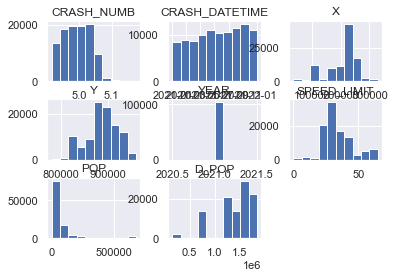

In [2500]:
mac_df.hist()
plt.show()

<AxesSubplot:title={'center':'Snacks by Texture'}, ylabel='CRASH_NUMB'>

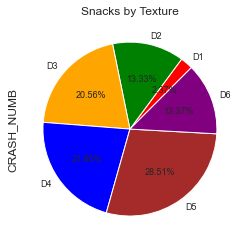

In [2501]:
mac_df.groupby('DISTRICT')['CRASH_NUMB'].count().plot(kind='pie', autopct='%1.2f%%', 
 startangle=45, fontsize=9, title="Snacks by Texture",colors = ['red', 'green', 'orange','blue','brown','purple'])

<AxesSubplot:ylabel='DISTRICT'>

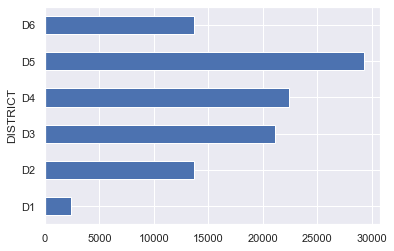

In [2502]:
mac_df.groupby('DISTRICT')['CRASH_NUMB'].count().plot(kind='barh')

<AxesSubplot:ylabel='ROAD_COND'>

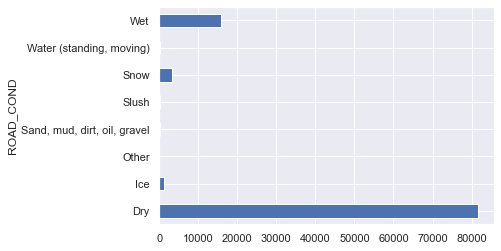

In [2503]:
mac_df.groupby('ROAD_COND')['DISTRICT'].count().plot(kind='barh')

(array([ 1328.,  1438.,  1301., 20464., 34199., 16993., 13431.,  2717.,
         5014.,  6556.]),
 array([ 0. ,  6.5, 13. , 19.5, 26. , 32.5, 39. , 45.5, 52. , 58.5, 65. ]),
 <BarContainer object of 10 artists>)

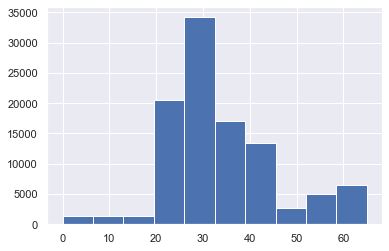

In [2504]:
plt.hist(mac_df['SPEED_LIMIT'])

<AxesSubplot:ylabel='Frequency'>

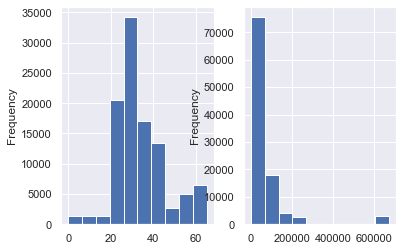

In [2505]:
figure, axes = plt.subplots(1,2) 

mac_df['SPEED_LIMIT'].plot(kind='hist',ax=axes[0])

mac_df['POP'].plot(kind='hist',ax = axes[1])

In [2506]:
print(mac_df.columns)

Index(['CRASH_NUMB', 'CITY_TOWN', 'CRASH_TIME', 'CRASH_DATETIME',
       'CRASH_SEVERITY', 'INJ_SVRTY', 'COLL_TYPE', 'AMB_LIGHT', 'WEATHER',
       'ROAD_COND', 'FIRST_HRMF_EVENT', 'MOST_HRMFL_EVT_CL', 'CIRCUMSTANCES',
       'X', 'Y', 'YEAR', 'AGE_YOUNG', 'AGE_OLD', 'SPEED_LIMIT', 'OPERATION',
       'STREET', 'TERRAIN', 'DISTRICT', 'POP', 'D_POP'],
      dtype='object')


/var/folders/1x/nd7lrckn6xvg7vd75cjvskvm0000gp/T/ipykernel_560/3258885776.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


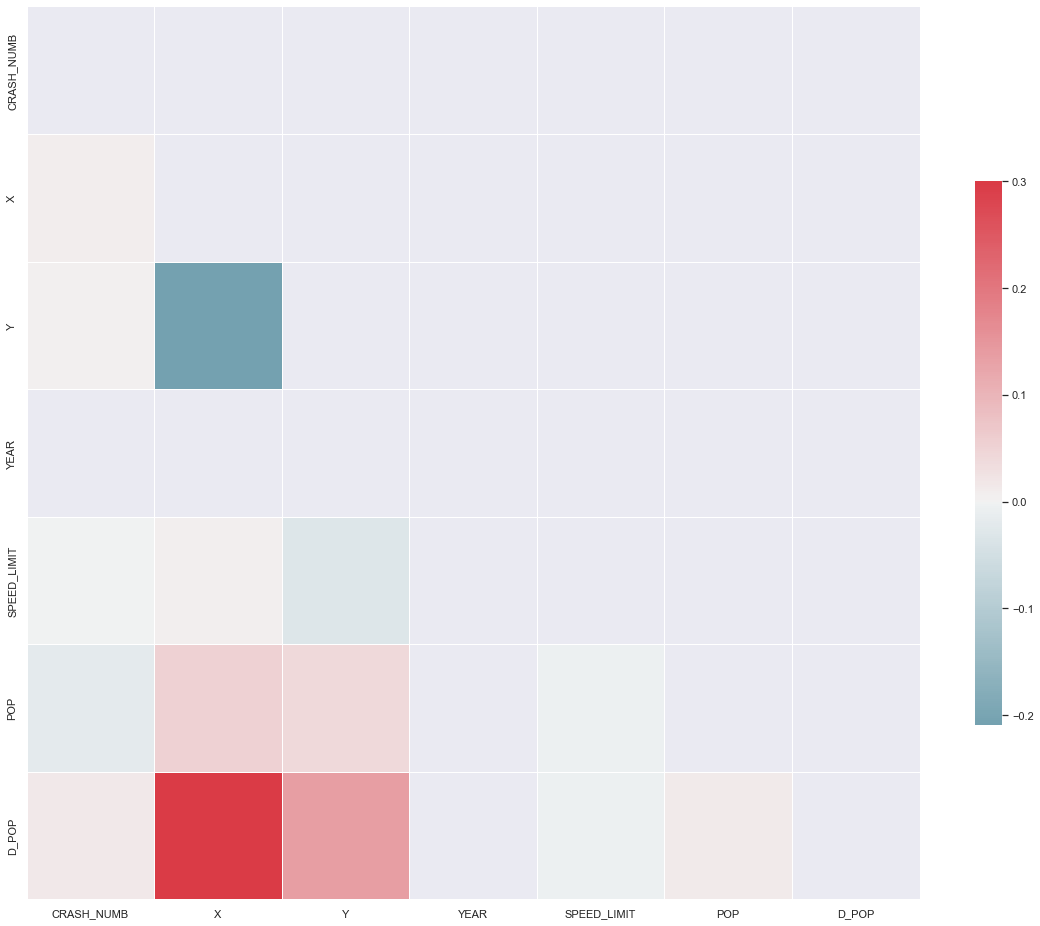

In [2507]:
# Compute the correlation matrix
corr = mac_df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Show the plot
plt.show()

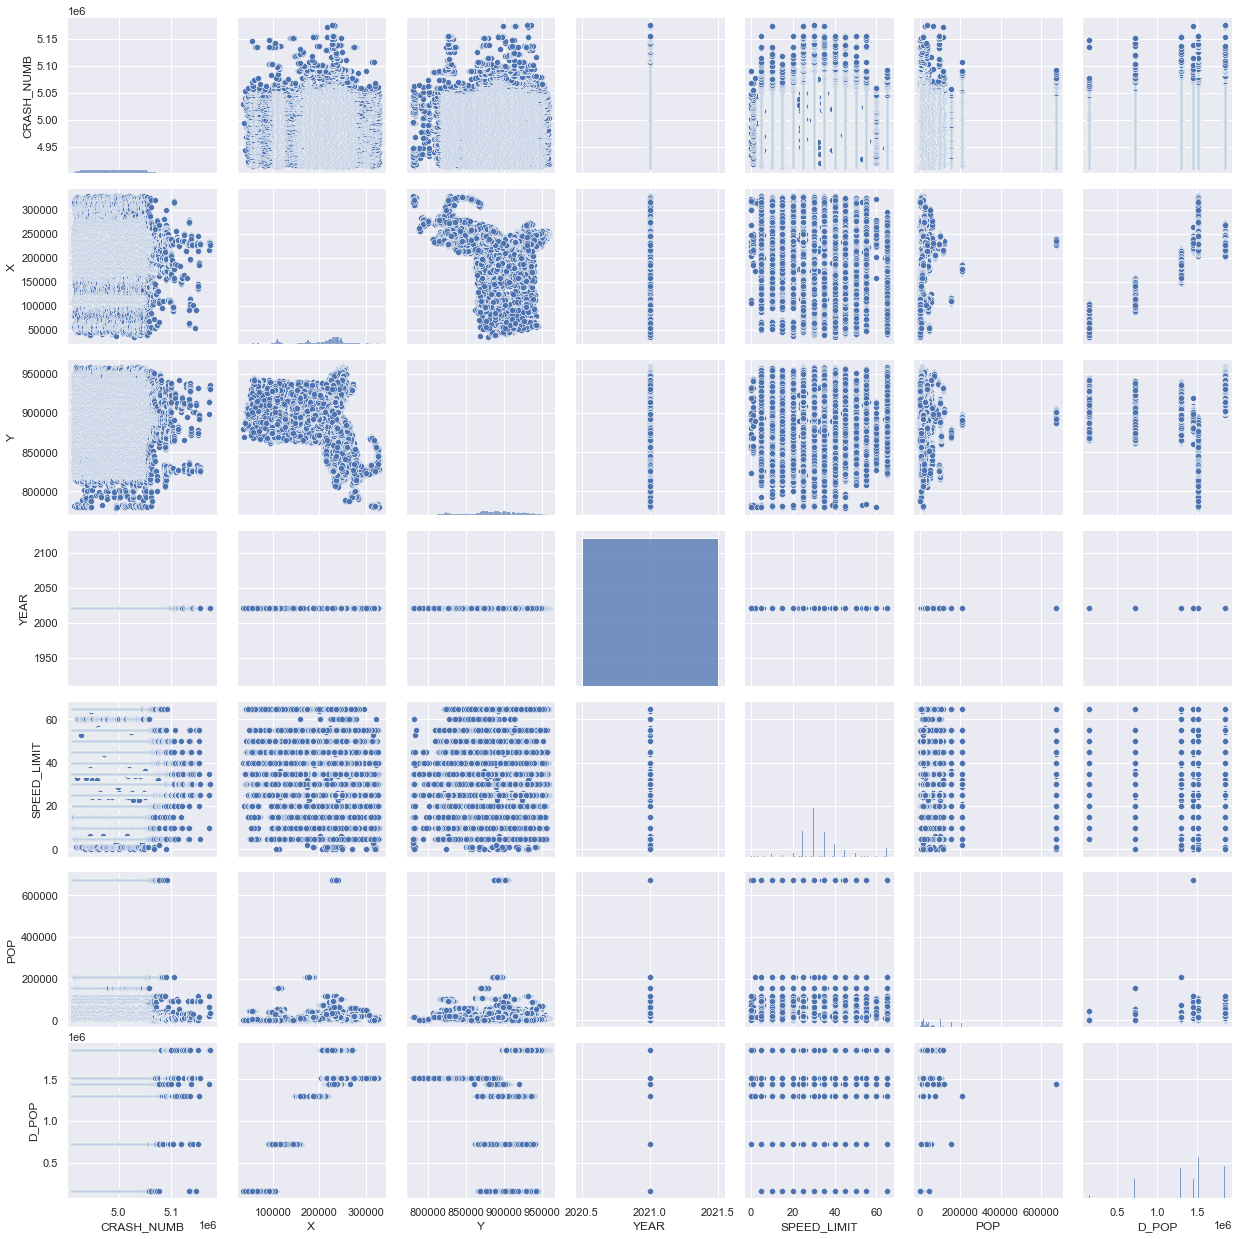

In [2508]:
sns.pairplot(mac_df)
plt.show()

<font size="12">LOCATION ANALYSIS</font>
<br>
<font size="2">The location attributes I will be analysing are district, and street for the number of cases in each location</font>

<font size="6">District Analysis</font>

In [2509]:
#creating a dataframe of the districts and their corresponding accident cases
district_df=pd.DataFrame(mac_df['DISTRICT'].value_counts()).reset_index().rename(columns={'index':"District",'DISTRICT':"Cases"})

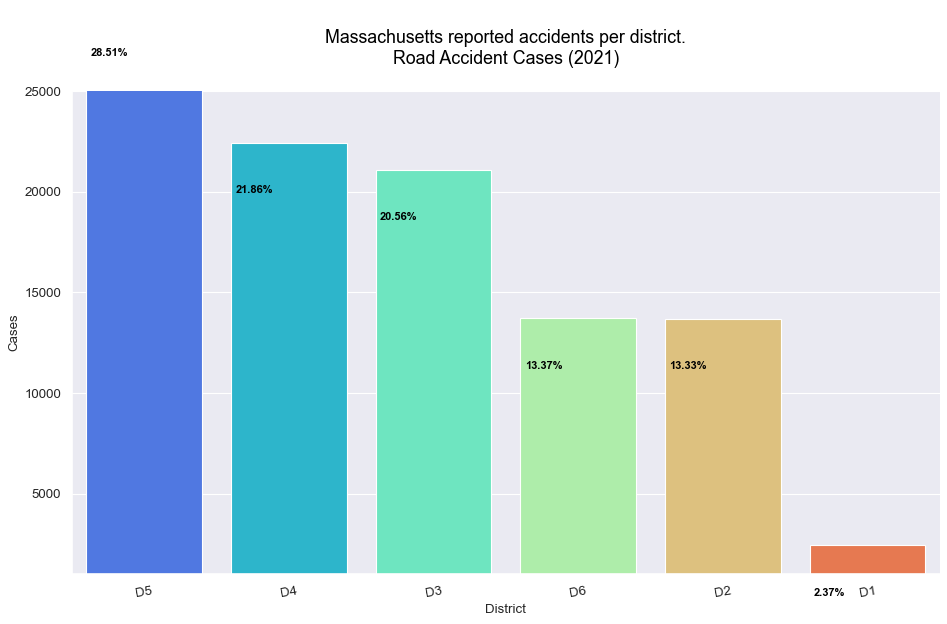

In [2510]:
fig, ax=plt.subplots(figsize=(14,8), dpi=80)
cmap=mpl.cm.get_cmap('rainbow',10)
clrs = [mpl.colors.rgb2hex(cmap(i)) for i in range(cmap.N)]
#cmap=cm.get_cmap('rainbow',10)
clrs=[matplotlib.colors.rgb2hex(cmap(i)) for i in range(cmap.N)]

ax=sns.barplot(y=district_df['Cases'],x=district_df['District'], palette = 'rainbow')

total=sum(district_df['Cases'])
for i in ax.patches:
    ax.text(i.get_x()+.03, i.get_height()-2500, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=10, weight='bold',
                color='black')
    
plt.title('\nMassachusetts reported accidents per district.\nRoad Accident Cases (2021)\n', size=16, color='black')

plt.rcParams['font.family'] = "Microsoft JhengHei UI Light"
plt.rcParams['font.serif'] = ["Microsoft JhengHei UI Light"]

plt.ylim(1000, 25000)
plt.xticks(rotation=10, fontsize=12)
plt.yticks(fontsize=12)

for i in ['bottom', 'left']:
    ax.spines[i].set_color('white')
    ax.spines[i].set_linewidth(1.5)
    
right_side = ax.spines["right"]
right_side.set_visible(False)
top_side = ax.spines["top"]
top_side.set_visible(False)

In [2511]:
#creating a dataframe that shows road conditions during accidents for each district
district_conds = mac_df.groupby(['DISTRICT', 'ROAD_COND']).size().reset_index(name='count')

pivoted_dc = district_conds.pivot(index='DISTRICT', columns='ROAD_COND', values='count')

#combining snow, slush, and ice to create winter conditions
pivoted_dc['Winter_Condition']=pivoted_dc[['Ice','Slush','Snow']].sum(axis=1)

pivoted_dc

ROAD_COND,Dry,Ice,Other,"Sand, mud, dirt, oil, gravel",Slush,Snow,"Water (standing, moving)",Wet,Winter_Condition
DISTRICT,,,,,,,,,
D1,1810,61,2,14,16,149,3,378,226
D2,10698,165,4,25,42,538,9,2203,745
D3,16607,341,6,26,76,870,48,3124,1287
D4,17921,273,18,24,64,606,54,3473,943
D5,23680,238,12,64,44,819,26,4371,1101
D6,10947,70,4,14,18,278,24,2365,366


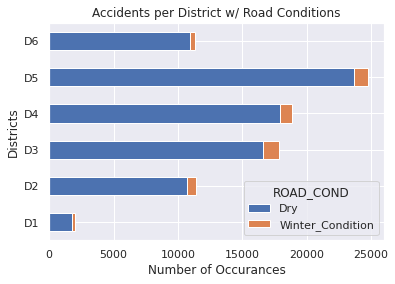

In [2512]:
# Select the "Dry" and "Winter_Condition" columns for the plot
plot_data = pivoted_dc[['Dry', 'Winter_Condition']]

plot_data.plot(kind='barh', stacked=True)

plt.title('Accidents per District w/ Road Conditions')
plt.xlabel('Number of Occurances')
plt.ylabel('Districts')

plt.show()

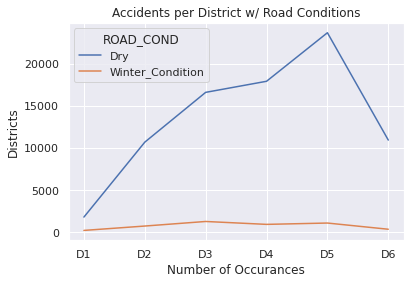

In [2513]:
# Select the "Dry" and "Winter_Condition" columns for the plot
plot_data = pivoted_dc[['Dry', 'Winter_Condition']]

plot_data.plot(kind='line', stacked=False)

plt.title('Accidents per District w/ Road Conditions')
plt.xlabel('Number of Occurances')
plt.ylabel('Districts')

plt.show()

In [2514]:
#Creating new dataframe representing district accidents per month
# Create a new column with just the month of the date
mac_df['MONTH'] = mac_df['CRASH_DATETIME'].dt.month

# Group the data by month and district, and count the number of occurrences
monthly_counts = mac_df.groupby(['MONTH', 'DISTRICT']).size().reset_index(name='count')

# Pivot the data to create the desired dataframe structure
districts_per_month = monthly_counts.pivot(index='MONTH', columns='DISTRICT', values='count')

# Convert the month and district columns into regular columns
districts_per_month = districts_per_month.reset_index()

print(districts_per_month)

DISTRICT  MONTH   D1    D2    D3    D4    D5    D6
0             1  197   856  1536  1557  1856   860
1             2  182   964  1668  1670  2059   927
2             3  153   970  1353  1429  1926   936
3             4  184   984  1483  1545  2055  1065
4             5  190  1178  1795  1988  2520  1121
5             6  204  1219  1877  2019  2573  1162
6             7  204  1240  1752  1865  2734  1129
7             8  223  1075  1765  1830  2566  1226
8             9  188  1348  1849  2071  2675  1280
9            10  213  1362  2044  2229  2896  1474
10           11  248  1272  2026  2128  2618  1282
11           12  247  1216  1950  2102  2776  1258


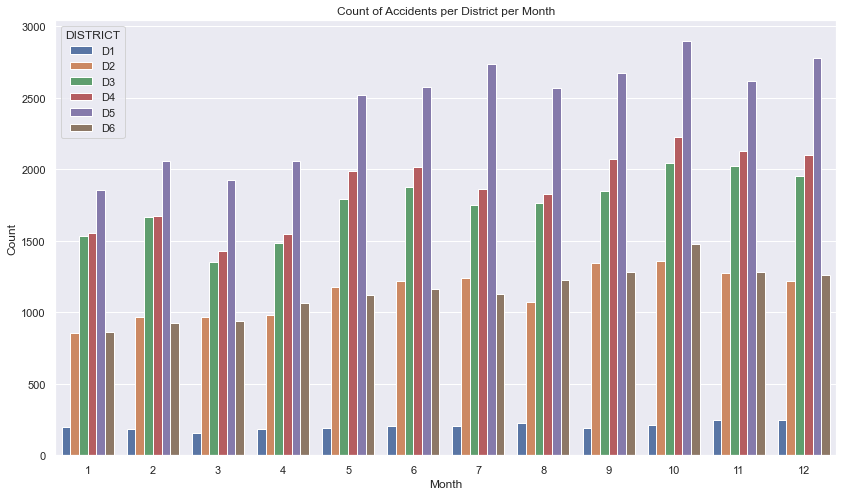

In [2515]:
# Set seaborn style
sns.set(style="darkgrid")

# Initialize figure and axis
fig, ax = plt.subplots(figsize=(14,8))

# Use seaborn's barplot function to plot the data
sns.barplot(x="MONTH", y="count", hue="DISTRICT", data=monthly_counts, ax=ax)

# Add a title and axis labels
plt.title("Count of Accidents per District per Month")
plt.ylabel("Count")
plt.xlabel("Month")

# Show plot
plt.show()

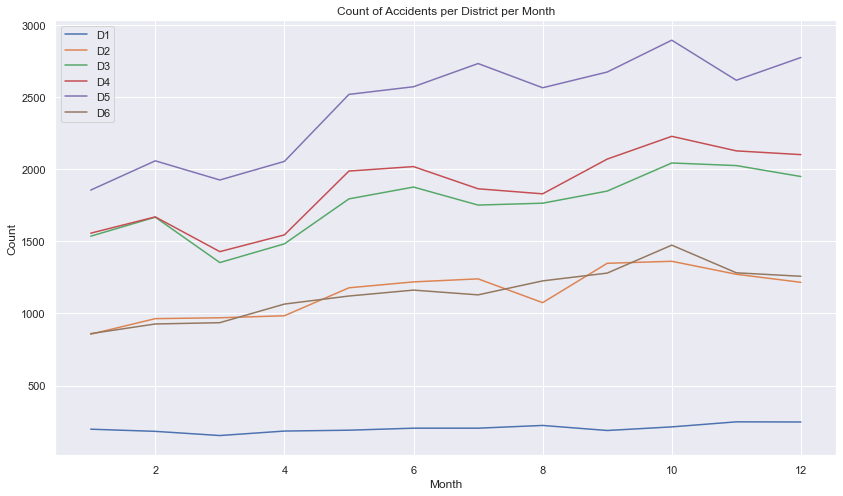

In [2516]:
# Initialize figure and axis
fig, ax = plt.subplots(figsize=(14,8))

# Plot the data for each district separately
for district in monthly_counts['DISTRICT'].unique():
    data = monthly_counts[monthly_counts['DISTRICT'] == district]
    sns.lineplot(x="MONTH", y="count", data=data, ax=ax, label=district)

# Add a title and axis labels
plt.title("Count of Accidents per District per Month")
plt.ylabel("Count")
plt.xlabel("Month")

# Show plot
plt.show()

In [2517]:
#creating a dataframe for cities/towns
city_df=pd.DataFrame(mac_df['CITY_TOWN'].value_counts()).reset_index().rename(columns={'index':'City', 'CITY_TOWN':'Cases'})

In [2518]:
top_10_city=pd.DataFrame(city_df.head(10))

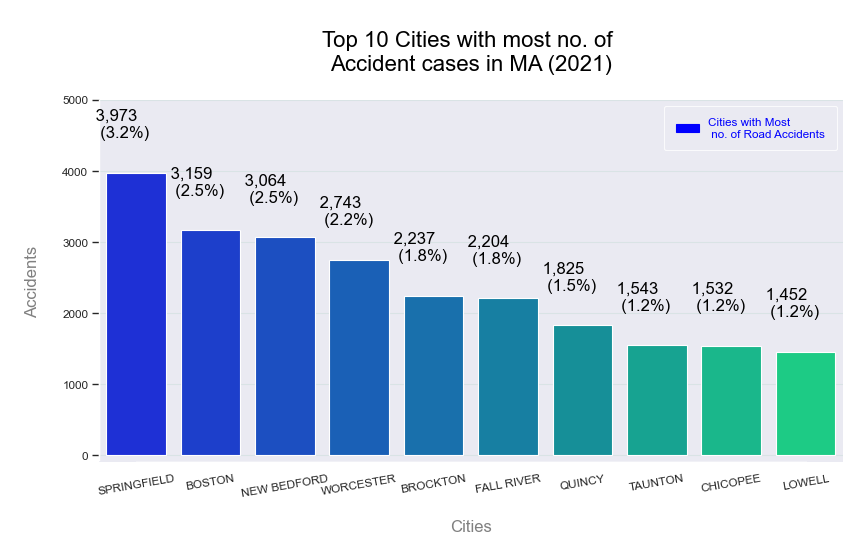

In [2519]:
fig, ax = plt.subplots(figsize = (12,6), dpi = 80)

cmap = cm.get_cmap('winter', 10)   
clrs = [matplotlib.colors.rgb2hex(cmap(i)) for i in range(cmap.N)]

ax=sns.barplot(y=city_df['Cases'].head(10), x=city_df['City'].head(10), palette='winter')
ax1 = ax.twinx()
#sns.lineplot(data = city_df[:10], marker='o', x='City', y='Cases', color = 'white', alpha = .8)


total = df.shape[0]
for i in ax.patches:
    ax.text(i.get_x()-0.2, i.get_height()+500, \
            ' {:,d}\n  ({}%) '.format(int(i.get_height()), round(100*i.get_height()/total, 1)), fontsize=15,
                color='black')


ax.set(ylim =(-100, 5000))
ax1.set(ylim =(-100, 17000))

plt.title('\nTop 10 Cities with most no. of \nAccident cases in MA (2021)\n', size=20, color='black')
ax1.axes.yaxis.set_visible(False)
ax.set_xlabel('\nCities\n', fontsize=15, color='grey')
ax.set_ylabel('\nAccidents\n', fontsize=15, color='grey')

for i in ['top','right']:
    side1 = ax.spines[i]
    side1.set_visible(False)
    side2 = ax1.spines[i]
    side2.set_visible(False)
    
ax.set_axisbelow(True)
ax.grid(color='#b2d6c7', linewidth=1, axis='y', alpha=.3)

ax.spines['bottom'].set_bounds(0.005, 9)
ax.spines['left'].set_bounds(0, 5000)
ax1.spines['bottom'].set_bounds(0.005, 9)
ax1.spines['left'].set_bounds(0,5000)
ax.tick_params(axis='y', which='major', labelsize=10.6)
ax.tick_params(axis='x', which='major', labelsize=10.6, rotation=10)

MA = mpatches.Patch(color=clrs[0], label='Cities with Most\n no. of Road Accidents')
ax.legend(handles=[MA], prop={'size': 10.5}, loc='best', borderpad=1, 
          labelcolor=clrs[0], edgecolor='white');

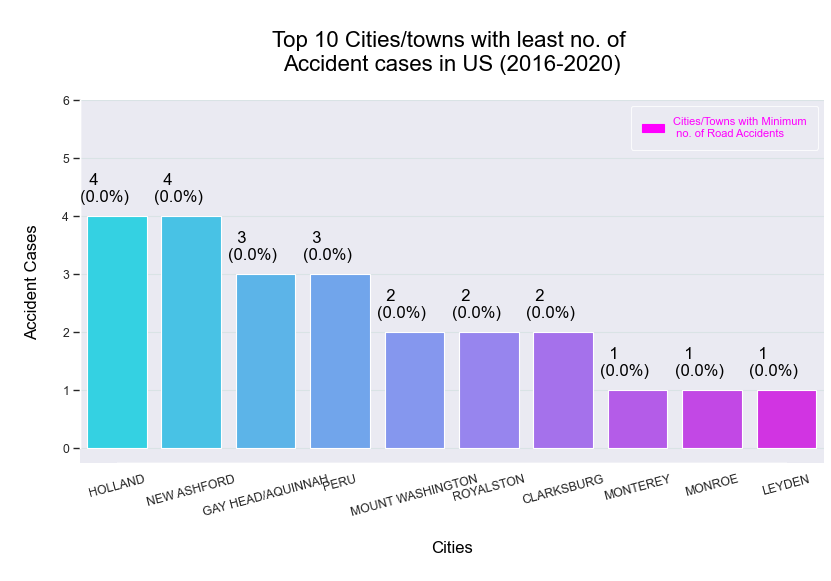

In [2520]:
fig, ax = plt.subplots(figsize = (12,6), dpi = 80)

cmap = cm.get_cmap('cool', 10)   
clrs = [matplotlib.colors.rgb2hex(cmap(i)) for i in range(cmap.N)]

ax=sns.barplot(y=city_df['Cases'].tail(10), x=city_df['City'].tail(10), palette='cool')
ax1 = ax.twinx()

total = df.shape[0]
for i in ax.patches:
    ax.text(i.get_x()-0.1, i.get_height()+.25, \
            '  {:,d}\n({}%) '.format(int(i.get_height()), round(100*i.get_height()/total, 2)), fontsize=15,
                color='black')

ax.set(ylim =(-.25, 6))
ax1.set(ylim =(-.25, 6))

plt.title('\nTop 10 Cities/towns with least no. of \nAccident cases in US (2016-2020)\n', size=20, color='black')
ax1.axes.yaxis.set_visible(False)
ax.set_xlabel('\nCities\n', fontsize=15, color='black')
ax.set_ylabel('\nAccident Cases\n', fontsize=15, color='black')

for i in ['top', 'right']:
    side = ax.spines[i]
    side.set_visible(False)
    side1 = ax1.spines[i]
    side1.set_visible(False)
    
    
ax.set_axisbelow(True)
ax.grid(color='#b2d6c7', linewidth=1, axis='y', alpha=.3)

ax.spines['bottom'].set_bounds(0.005, 9)
ax.spines['left'].set_bounds(0, 6)
ax1.spines['bottom'].set_bounds(0.005, 9)
ax1.spines['left'].set_bounds(0, 6)
ax.tick_params(axis='y', which='major', labelsize=11)
ax.tick_params(axis='x', which='major', labelsize=11, rotation=15)

MI = mpatches.Patch(color=clrs[-1], label='Cities/Towns with Minimum\n no. of Road Accidents')
ax.legend(handles=[MI], prop={'size': 10}, loc='best', borderpad=1, 
          labelcolor=clrs[-1], edgecolor='white');

In [2521]:
# leaving this space to analyze district accident density on a map

<font size="6">Time Analysis</font>

In [2522]:
#pulling month from the column
mac_df['MONTH']=mac_df["CRASH_DATETIME"].dt.month

#grouping the months together naming it to count
crash_per_month=mac_df.groupby('MONTH').size().reset_index(name="CASES")

In [2523]:
crash_per_month

,MONTH,CASES
0,1,6918
1,2,7527
2,3,6825
3,4,7372
4,5,8871
5,6,9123
6,7,8976
7,8,8756
8,9,9493
9,10,10296


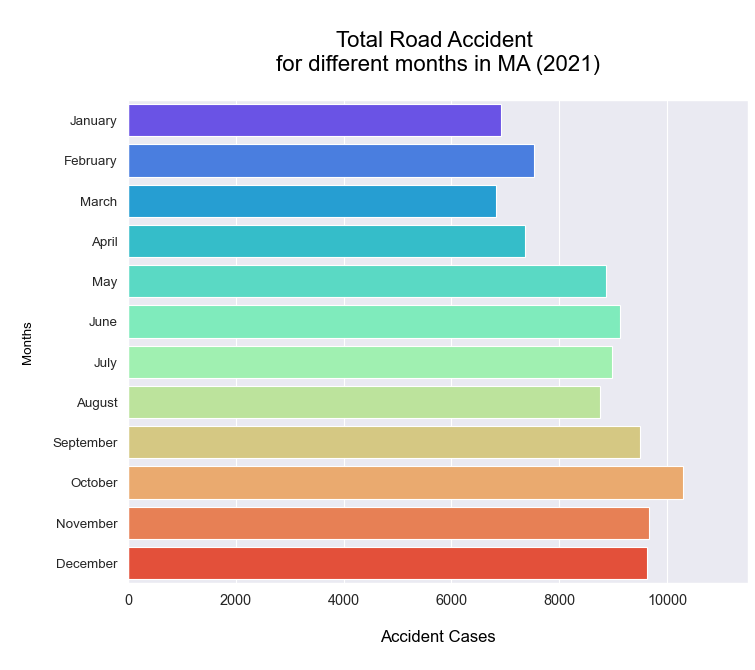

In [2524]:
# Create a figure and an axis
fig, ax = plt.subplots(figsize=(10, 8), dpi=80)

# Set the color palette for the bars
cmap = sns.color_palette("rainbow", 12)

# Plot the horizontal bar chart using Seaborn
sns.barplot(x="CASES", y="MONTH", data=crash_per_month, palette=cmap, ax=ax, orient="h")

# Set the x-axis label
ax.set_xlabel("Accident Cases", fontsize=15)

# Set the y-axis label
ax.set_ylabel("Months", fontsize=15)

# Set the y-ticks to be month names
ax.set_yticklabels(["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"])

#adding map titles and x/y axis labels 
plt.title('\nTotal Road Accident \nfor different months in MA (2021)\n', size=20, color='black')
plt.xlabel('\nAccident Cases\n', fontsize=15, color='black')
plt.ylabel('\nMonths\n', fontsize=12, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xlim(0, 11500)

# Show the plot
plt.show()

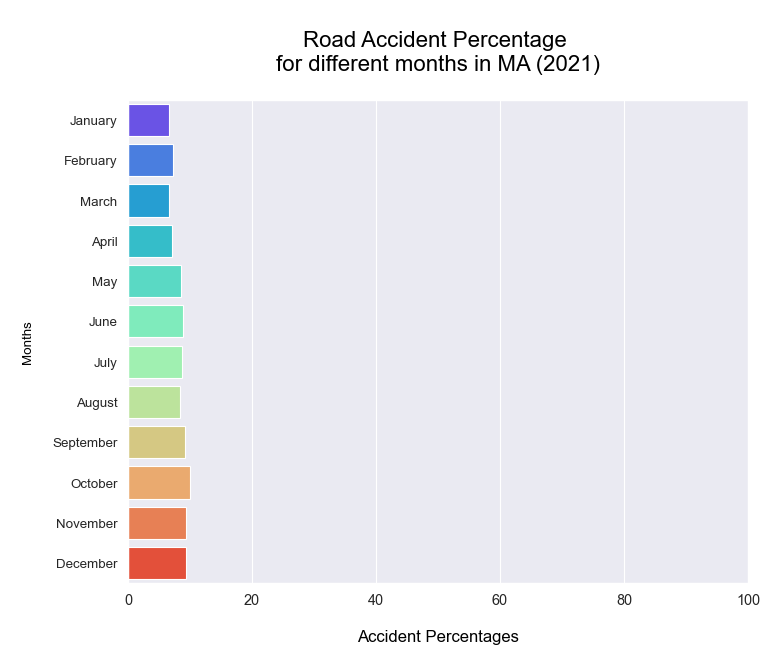

In [2525]:
# Calculate the total number of cases
total_cases = crash_per_month["CASES"].sum()

# Create a figure and an axis
fig, ax = plt.subplots(figsize=(10, 8), dpi=80)

# Set the color palette for the bars
cmap = sns.color_palette("rainbow", 12)

# Plot the horizontal bar chart using Seaborn
sns.barplot(x=crash_per_month["CASES"]/total_cases*100, y="MONTH", data=crash_per_month, palette=cmap, ax=ax, orient="h")

# Set the x-axis label
ax.set_xlabel("Accident Cases (%)", fontsize=15)

# Set the y-axis label
ax.set_ylabel("Months", fontsize=15)

# Set the y-ticks to be month names
ax.set_yticklabels(["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"])

#adding map titles and x/y axis labels 
plt.title('\nRoad Accident Percentage \nfor different months in MA (2021)\n', size=20, color='black')
plt.xlabel('\nAccident Percentages\n', fontsize=15, color='black')
plt.ylabel('\nMonths\n', fontsize=12, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xlim(0, 100)

# Show the plot
plt.show()

In [2526]:
#seaborn, give one additional parameter, pie=weather. and it will stack bar chart

In [2527]:
# Convert the date column to datetime format
mac_df['CRASH_DATETIME'] = pd.to_datetime(mac_df['CRASH_DATETIME'], format='%Y-%m-%d')

# Create a new column with just the month of the date
mac_df['MONTH'] = mac_df['CRASH_DATETIME'].dt.month

# Group the data by month and road condition, and count the number of occurrences
monthly_counts = mac_df.groupby(['MONTH', 'ROAD_COND']).size().reset_index(name='count')

# Pivot the data to create the desired dataframe structure
pivoted_df = monthly_counts.pivot(index='MONTH', columns='ROAD_COND', values='count')

# Fill any missing values with 0
pivoted_df = pivoted_df.fillna(0)

pivoted_df

#combining ice slush, snow into "winter" category and removing
pivoted_df['Winter_Condition']=pivoted_df[['Ice','Slush','Snow']].sum(axis=1)
pivoted_df


ROAD_COND,Dry,Ice,Other,"Sand, mud, dirt, oil, gravel",Slush,Snow,"Water (standing, moving)",Wet,Winter_Condition
MONTH,,,,,,,,,
1,4865.0,245.0,4.0,13.0,56.0,912.0,5.0,818.0,1213.0
2,3594.0,456.0,5.0,23.0,121.0,1942.0,3.0,1383.0,2519.0
3,6241.0,9.0,1.0,10.0,0.0,8.0,2.0,554.0,17.0
4,6082.0,9.0,3.0,14.0,34.0,84.0,6.0,1140.0,127.0
5,7609.0,0.0,3.0,12.0,0.0,2.0,14.0,1231.0,2.0
6,8257.0,0.0,1.0,19.0,0.0,0.0,8.0,838.0,0.0
7,6768.0,0.0,2.0,10.0,0.0,1.0,33.0,2162.0,1.0
8,7700.0,0.0,6.0,17.0,0.0,0.0,23.0,1010.0,0.0
9,7935.0,1.0,4.0,15.0,0.0,1.0,18.0,1519.0,2.0


<Figure size 360000x360000 with 0 Axes>

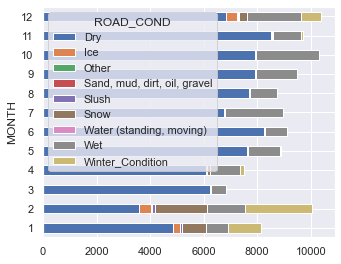

In [2528]:
# Set the figure size to be twice the default size
plt.figure(figsize=(5000, 5000))

pivoted_df.plot(kind='barh', stacked=True)

# Adjust the plot size to fill the figure
plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)

plt.show()

#remove winter conditions from chart below

<Figure size 360000x360000 with 0 Axes>

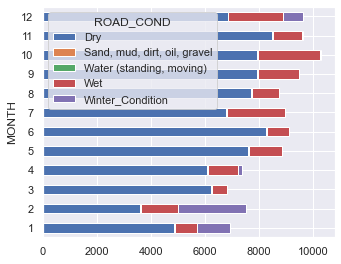

In [2529]:
# Drop the Ice, Slush, and Snow columns from the dataframe
pivoted_df = pivoted_df.drop(columns=['Ice', 'Slush', 'Snow','Other'])

# Set the figure size to be twice the default size
plt.figure(figsize=(5000, 5000))

# Create the stacked bar chart
pivoted_df.plot(kind='barh', stacked=True)

# Adjust the plot size to fill the figure
plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)

plt.show()


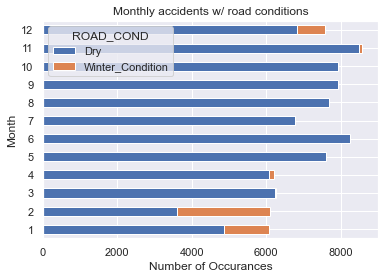

In [2530]:
# Select the "Dry" and "Winter_Condition" columns for the plot
plot_data = pivoted_df[['Dry', 'Winter_Condition']]

plot_data.plot(kind='barh', stacked=True)

plt.title('Monthly accidents w/ road conditions')
plt.xlabel('Number of Occurances')
plt.ylabel('Month')

plt.show()

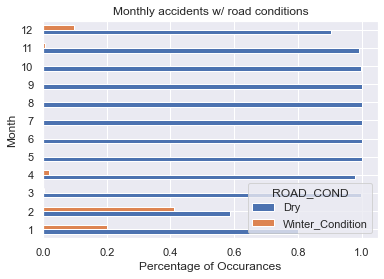

In [2531]:
# Select the "Dry" and "Winter_Condition" columns for the plot
plot_data = pivoted_df[['Dry', 'Winter_Condition']]

# Normalize the data so each bar represents the percentage of occurances that are "Winter_Condition" per month
plot_data = plot_data.divide(plot_data.sum(axis=1), axis=0)

plot_data.plot(kind='barh', stacked=False)

plt.title('Monthly accidents w/ road conditions')
plt.xlabel('Percentage of Occurances')
plt.ylabel('Month')

plt.show()

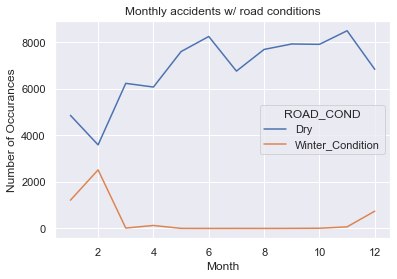

In [2532]:
plot_data = pivoted_df[['Dry', 'Winter_Condition']]

plot_data.plot(kind='line', stacked=False)

plt.title('Monthly accidents w/ road conditions')
plt.ylabel('Number of Occurances')
plt.xlabel('Month')

plt.show()

<font size="6">Condition Analysis</font>

In [2533]:
#creating a new dataframe with the below parameters
selected_columns = ['AMB_LIGHT', 'WEATHER', 'ROAD_COND', 'CRASH_DATETIME', 'DISTRICT', 'COLL_TYPE']
weather_df =weather_cond[selected_columns]
weather_df.head()

,AMB_LIGHT,WEATHER,ROAD_COND,CRASH_DATETIME,DISTRICT,COLL_TYPE
0,Dark - lighted roadway,Clear,Dry,2021/01/01 17:31:00+00,D5,Rear-end
1,Dark - lighted roadway,Clear,Dry,2021/01/01 17:04:00+00,D5,"Sideswipe, same direction"
2,Daylight,Clear,Wet,2021/01/02 10:13:00+00,D3,Angle
3,Dark - lighted roadway,Clear,Dry,2021/01/01 04:02:00+00,D3,Single vehicle crash
5,Dark - lighted roadway,Winter Conditions,Snow,2021/01/01 23:08:00+00,D4,Head-on


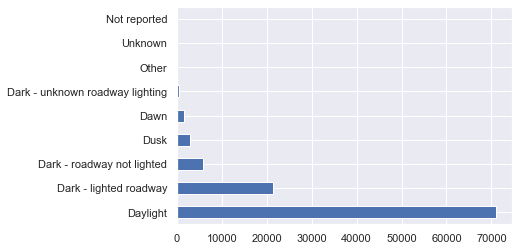

In [2534]:
#Getting values of ambient light from the new dataframe
ambient_light = weather_df['AMB_LIGHT'].value_counts()

#Bar plot for ambient light accident count
ambient_light.plot(kind='barh', x='Ambient Lighting', y='count')

plt.show()

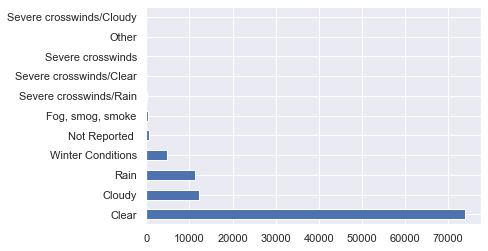

In [2535]:
#Getting values of weather condition from the new dataframe
weather = weather_df['WEATHER'].value_counts()

#Bar plot for weather condition accident count
weather.plot(kind='barh', x='Weather Condition', y='count')

plt.show()

In [2536]:
#saving dataset as excel to hand in as homework:
#mac_df.to_excel('JDTCAPSTONEDF.xlsx', index=False)

In [2537]:
#mac_df.shape

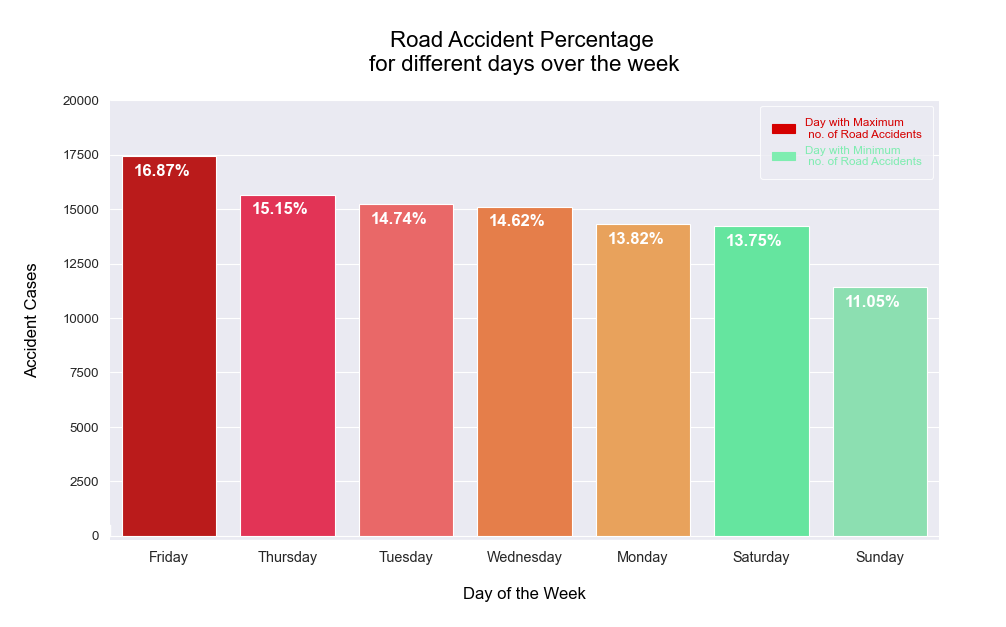

In [2538]:
#creating new column for days
mac_df['day_of_week'] = mac_df['CRASH_DATETIME'].dt.day_name()

#grouping data by counting crashes per day of the week
day_df = mac_df.groupby(['day_of_week'])['CRASH_DATETIME'].count().reset_index(name='count')

#sorting by descending order
day_df = day_df.sort_values(by='count', ascending=False)

#creating plot
fig, ax = plt.subplots(figsize = (12,8), dpi = 80)
ax = sns.barplot(x='day_of_week', y='count', data=day_df, palette=['#D50000', '#FF1744', '#FF5252', '#ff7530', '#ffa245', '#50fa9d', '#7eedb0'])

#calculating accident number
total = mac_df.shape[0]

#normalizing accident per day of week
for i in ax.patches:
    ax.text(i.get_x()+0.1, i.get_height()-900, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15, weight='bold', color='white')

# Set the y-axis limits
plt.ylim(-200, 20000)

# Set the title and labels for X and Y axes
plt.title('\nRoad Accident Percentage \nfor different days over the week\n', size=20, color='black')
plt.ylabel('\nAccident Cases\n', fontsize=15, color='black')
plt.xlabel('\nDay of the Week\n', fontsize=15, color='black')

# Set font sizes for X and Y tick labels
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)

# Remove spines
for i in ['top', 'right']:
    side = ax.spines[i]
    side.set_visible(False)
    
ax.set_axisbelow(True)
ax.spines['bottom'].set_bounds(0.005, 7)
ax.spines['left'].set_bounds(0, 500)

MA = mpatches.Patch(color='#D50000', label='Day with Maximum\n no. of Road Accidents')
MI = mpatches.Patch(color='#7eedb0', label='Day with Minimum\n no. of Road Accidents')

ax.legend(handles=[MA, MI], prop={'size': 10.5}, loc='best', borderpad=1, edgecolor='white', labelcolor=['#D50000', '#7eedb0'])

plt.tight_layout()

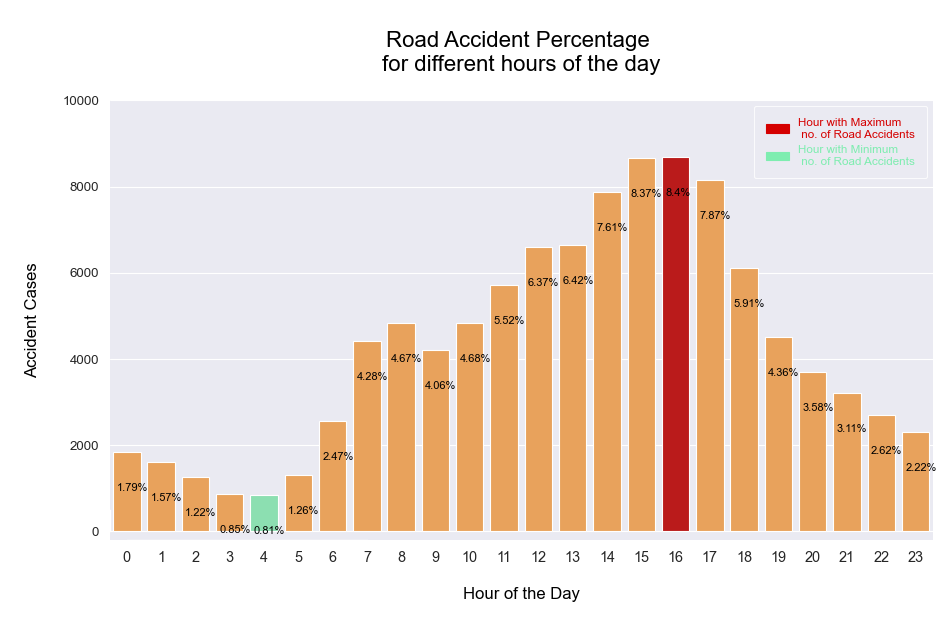

In [2539]:
#creating new column for hour of day
mac_df['hour_of_day'] = mac_df['CRASH_DATETIME'].dt.hour

#grouping data by counting crashes per hour of day
hour_df = mac_df.groupby(['hour_of_day'])['CRASH_DATETIME'].count().reset_index(name='count')

#creating plot
fig, ax = plt.subplots(figsize = (12,8), dpi = 80)
ax = sns.barplot(x='hour_of_day', y='count', data=hour_df, palette=['#7eedb0' if x == hour_df['count'].min() else '#D50000' if x == hour_df['count'].max() else '#ffa245' for x in hour_df['count']])

#calculating accident number
total = mac_df.shape[0]

#normalizing accident per day of week
for i in ax.patches:
    ax.text(i.get_x()+0.1, i.get_height()-900, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=10, color='black')

# Set the y-axis limits
plt.ylim(-200, 10000)

# Set the title and labels for X and Y axes
plt.title('\nRoad Accident Percentage \nfor different hours of the day\n', size=20, color='black')
plt.ylabel('\nAccident Cases\n', fontsize=15, color='black')
plt.xlabel('\nHour of the Day\n', fontsize=15, color='black')

# Set font sizes for X and Y tick labels
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)

# Remove spines
for i in ['top', 'right']:
    side = ax.spines[i]
    side.set_visible(False)
    
ax.set_axisbelow(True)
ax.spines['bottom'].set_bounds(0.005, 7)
ax.spines['left'].set_bounds(0, 500)

MA = mpatches.Patch(color='#D50000', label='Hour with Maximum\n no. of Road Accidents')
MI = mpatches.Patch(color='#7eedb0', label='Hour with Minimum\n no. of Road Accidents')

ax.legend(handles=[MA, MI], prop={'size': 10.5}, loc='best', borderpad=1, edgecolor='white', labelcolor=['#D50000', '#7eedb0'])

plt.tight_layout()



<font size="6">Collision Severity Analysis</font>

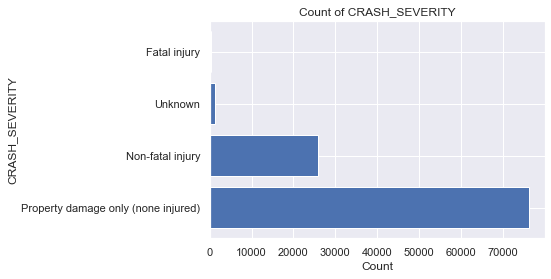

In [2540]:
# get the value count of each crash severity
value_counts = mac_df['CRASH_SEVERITY'].value_counts()

# plot the bar chart
plt.barh(value_counts.index, value_counts.values)

# set the x-axis label
plt.ylabel('CRASH_SEVERITY')

# set the y-axis label
plt.xlabel('Count')

# set the title of the chart
plt.title('Count of CRASH_SEVERITY')

# display the chart
plt.show()

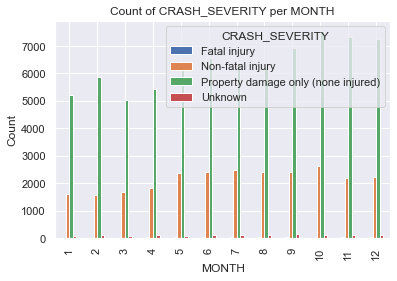

In [2541]:
# group by month and crash severity
grouped = mac_df.groupby(['MONTH', 'CRASH_SEVERITY'])['CRASH_SEVERITY'].count().unstack()

# plot the bar chart
grouped.plot(kind='bar', stacked=False)

# set the x-axis label
plt.xlabel('MONTH')

# set the y-axis label
plt.ylabel('Count')

# set the title of the chart
plt.title('Count of CRASH_SEVERITY per MONTH')

# display the chart
plt.show()

In [2542]:
mac_df['CRASH_SEVERITY'].value_counts()['Fatal injury']

296

In [2543]:
# Group the data by month and severity, and count the number of occurrences
CS_counts = mac_df.groupby(['MONTH', 'CRASH_SEVERITY']).size().reset_index(name='count')

# Pivot the data to create the desired dataframe structure
pivoted_df = CS_counts.pivot(index='MONTH', columns='CRASH_SEVERITY', values='count')

# Fill any missing values with 0
pivoted_df = pivoted_df.fillna(0)

pivoted_df

CRASH_SEVERITY,Fatal injury,Non-fatal injury,Property damage only (none injured),Unknown
MONTH,,,,
1,19,1611,5199,89
2,14,1556,5856,101
3,15,1689,5035,86
4,25,1812,5435,100
5,33,2363,6388,87
6,31,2419,6563,110
7,22,2463,6379,112
8,37,2394,6228,97
9,28,2391,6943,131


In [2544]:
# Group the data by month and road condition, and count the number of occurrences
CSD_counts = mac_df.groupby(['DISTRICT', 'CRASH_SEVERITY']).size().reset_index(name='count')

# Pivot the data to create the desired dataframe structure
pivoted_df = CSD_counts.pivot(index='DISTRICT', columns='CRASH_SEVERITY', values='count')

# Fill any missing values with 0
pivoted_df = pivoted_df.fillna(0)

pivoted_df

CRASH_SEVERITY,Fatal injury,Non-fatal injury,Property damage only (none injured),Unknown
DISTRICT,,,,
D1,13,550,1837,33
D2,47,3757,9716,164
D3,51,4541,16219,287
D4,57,5518,16540,318
D5,80,7719,21162,293
D6,42,3479,10052,147


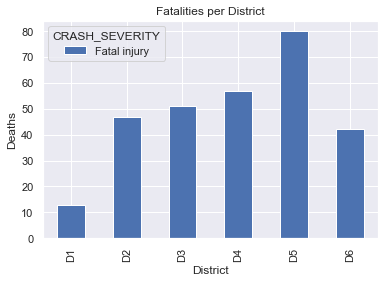

In [2545]:
plot_data = pivoted_df[['Fatal injury']]

plot_data.plot(kind='bar', stacked=True)

plt.title('Fatalities per District')
plt.xlabel('District')
plt.ylabel('Deaths')

plt.show()

In [2546]:
Dfatalities = mac_df[mac_df['CRASH_SEVERITY'] =='Fatal injury'] 

In [2547]:
Dfatalities.isnull().sum()

CRASH_NUMB           0
CITY_TOWN            0
CRASH_TIME           0
CRASH_DATETIME       0
CRASH_SEVERITY       0
INJ_SVRTY            0
COLL_TYPE            0
AMB_LIGHT            0
WEATHER              0
ROAD_COND            0
FIRST_HRMF_EVENT     0
MOST_HRMFL_EVT_CL    0
CIRCUMSTANCES        0
X                    0
Y                    0
YEAR                 0
AGE_YOUNG            0
AGE_OLD              0
SPEED_LIMIT          0
OPERATION            0
STREET               0
TERRAIN              0
DISTRICT             6
POP                  0
D_POP                6
MONTH                0
day_of_week          0
hour_of_day          0
dtype: int64

In [2548]:
#dropping null values
Dfatalities= Dfatalities.dropna(subset=['D_POP', 'DISTRICT'])

In [2549]:
unique_values = Dfatalities['D_POP'].unique()

# sum the unique values
result = unique_values.sum()

print("Sum of unique values:", result)


Sum of unique values: 6983720.0


In [2550]:
unique_values

array([1846261., 1514052., 1448841., 1295356.,  721921.,  157289.])

In [2551]:
monthly_counts = Dfatalities.groupby(['MONTH', 'DISTRICT']).size().reset_index(name='count')
districts_per_month = monthly_counts.pivot(index='MONTH', columns='DISTRICT', values='count')
districts_per_month = districts_per_month.reset_index()
print(districts_per_month)

DISTRICT  MONTH   D1   D2   D3    D4    D5   D6
0             1  NaN  NaN  4.0   2.0  10.0  3.0
1             2  NaN  3.0  2.0   5.0   3.0  1.0
2             3  1.0  2.0  3.0   2.0   2.0  5.0
3             4  2.0  4.0  7.0   4.0   5.0  2.0
4             5  2.0  6.0  5.0  13.0   4.0  2.0
5             6  2.0  5.0  6.0   4.0  11.0  3.0
6             7  NaN  4.0  2.0   2.0   8.0  6.0
7             8  NaN  5.0  4.0   7.0  13.0  7.0
8             9  2.0  7.0  5.0   5.0   5.0  3.0
9            10  1.0  2.0  3.0   3.0   7.0  3.0
10           11  1.0  6.0  3.0   1.0   7.0  3.0
11           12  2.0  3.0  7.0   9.0   5.0  4.0


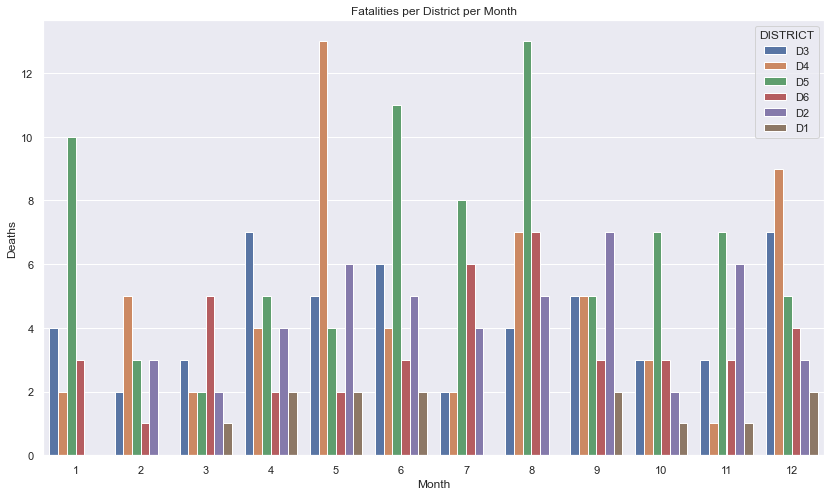

In [2552]:
#looking at deaths per disctrict per month
sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(14,8))
sns.barplot(x="MONTH", y="count", hue="DISTRICT", data=monthly_counts, ax=ax)
plt.title("Fatalities per District per Month")
plt.ylabel("Deaths")
plt.xlabel("Month")
plt.show()

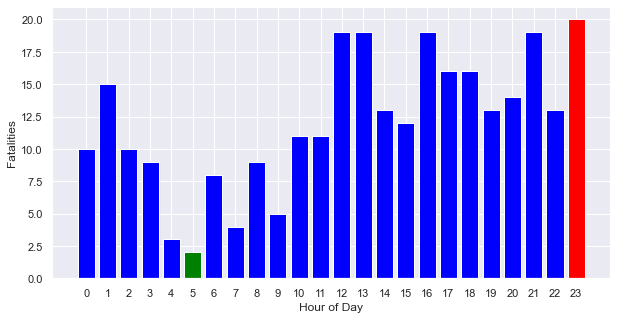

In [2553]:
#analyzing fatalities depending on hour of the day
hour_counts = Dfatalities['hour_of_day'].value_counts()
max_value = np.max(hour_counts.values)
min_value = np.min(hour_counts.values)
fig, ax = plt.subplots(figsize=(10, 5))

for i, value in enumerate(hour_counts.values):
    color = "blue"
    if value == max_value:
        color = "red"
    elif value == min_value:
        color = "green"
    ax.bar(hour_counts.index[i], value, color=color)

ax.set_xticks(hour_counts.index)
ax.set_xlabel("Hour of Day")
ax.set_ylabel("Fatalities")
plt.show()

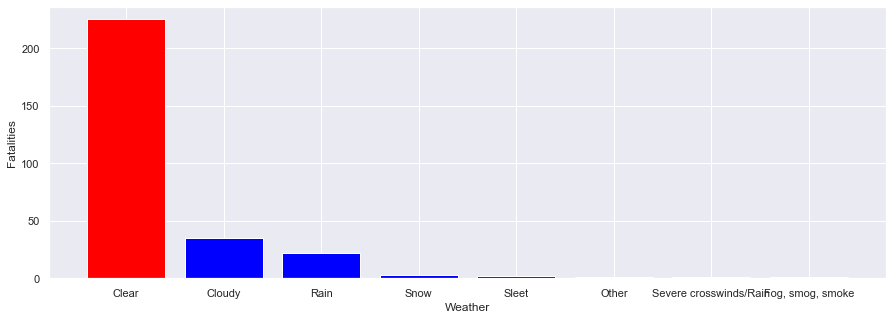

In [2554]:
weather_counts = Dfatalities['WEATHER'].value_counts()
max_value = np.max(weather_counts.values)
min_value = np.min(weather_counts.values)
fig, ax = plt.subplots(figsize=(15, 5))

for i, value in enumerate(weather_counts.values):
    color = "blue"
    if value == max_value:
        color = "red"
    elif value == min_value:
        color = "green"
    ax.bar(weather_counts.index[i], value, color=color)

ax.set_xticks(weather_counts.index)
ax.set_xlabel("Weather")
ax.set_ylabel("Fatalities")
plt.show()

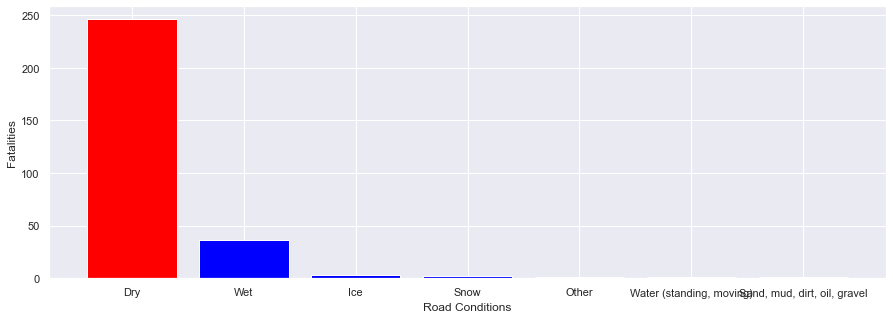

In [2555]:
road_counts = Dfatalities['ROAD_COND'].value_counts()
max_value = np.max(road_counts.values)
min_value = np.min(road_counts.values)
fig, ax = plt.subplots(figsize=(15, 5))

for i, value in enumerate(road_counts.values):
    color = "blue"
    if value == max_value:
        color = "red"
    elif value == min_value:
        color = "green"
    ax.bar(road_counts.index[i], value, color=color)

ax.set_xticks(road_counts.index)
ax.set_xlabel("Road Conditions")
ax.set_ylabel("Fatalities")
plt.show()

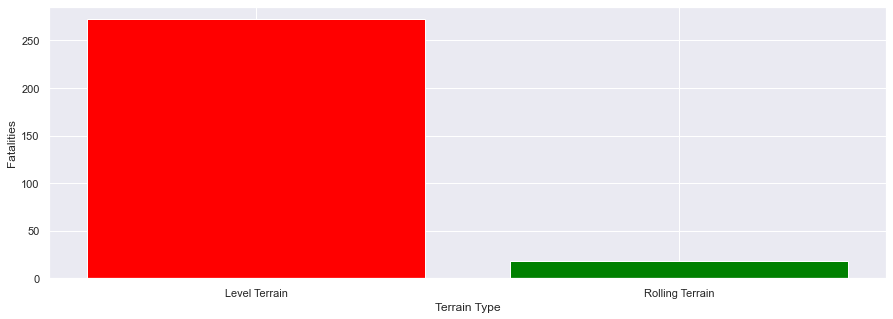

In [2556]:
terr_counts = Dfatalities['TERRAIN'].value_counts()
max_value = np.max(terr_counts.values)
min_value = np.min(terr_counts.values)
fig, ax = plt.subplots(figsize=(15, 5))

for i, value in enumerate(terr_counts.values):
    color = "blue"
    if value == max_value:
        color = "red"
    elif value == min_value:
        color = "green"
    ax.bar(terr_counts.index[i], value, color=color)

ax.set_xticks(terr_counts.index)
ax.set_xlabel("Terrain Type")
ax.set_ylabel("Fatalities")
plt.show()

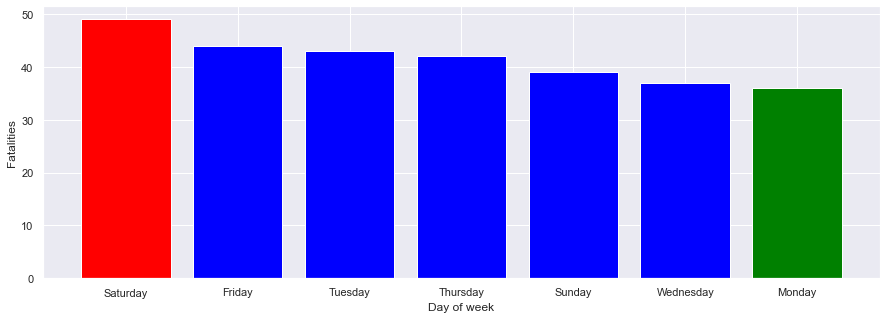

In [2557]:
date_counts = Dfatalities['day_of_week'].value_counts()
max_value = np.max(date_counts.values)
min_value = np.min(date_counts.values)
fig, ax = plt.subplots(figsize=(15, 5))

for i, value in enumerate(date_counts.values):
    color = "blue"
    if value == max_value:
        color = "red"
    elif value == min_value:
        color = "green"
    ax.bar(date_counts.index[i], value, color=color)

ax.set_xticks(date_counts.index)
ax.set_xlabel("Day of week")
ax.set_ylabel("Fatalities")
plt.show()

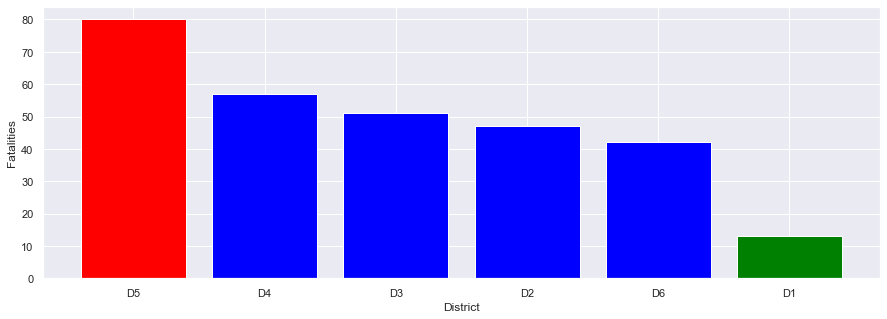

In [2558]:
d_counts = Dfatalities['DISTRICT'].value_counts()
max_value = np.max(d_counts.values)
min_value = np.min(d_counts.values)
fig, ax = plt.subplots(figsize=(15, 5))

for i, value in enumerate(d_counts.values):
    color = "blue"
    if value == max_value:
        color = "red"
    elif value == min_value:
        color = "green"
    ax.bar(d_counts.index[i], value, color=color)

ax.set_xticks(d_counts.index)
ax.set_xlabel("District")
ax.set_ylabel("Fatalities")
plt.show()

In [2559]:
district_populations

{'D1': 157289,
 'D2': 721921,
 'D3': 1295356,
 'D4': 1846261,
 'D5': 1514052,
 'D6': 1448841}

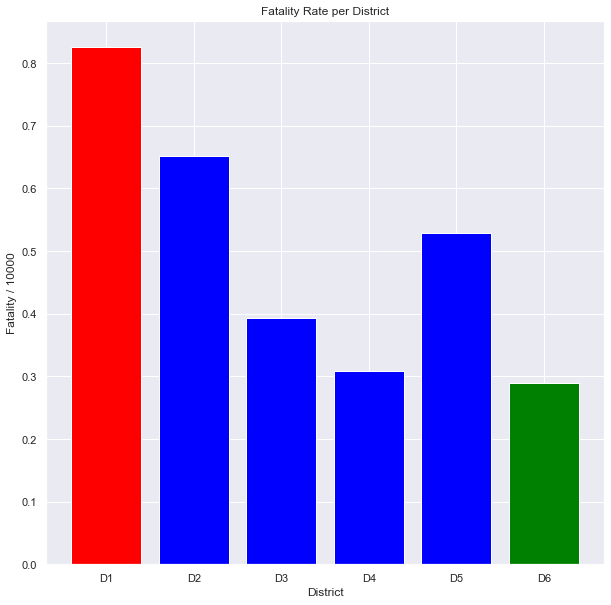

In [2560]:
#normalizing the above graph to assess the likelihood of a fatality

# calculate the normalized fatalities by dividing the number of fatalities by the population
d_pop = Dfatalities.groupby('DISTRICT').sum()['D_POP']
d_norm = d_counts*10000 / (d_pop/Dfatalities.groupby('DISTRICT').count()['D_POP'])

max_value = np.max(d_norm.values)
min_value = np.min(d_norm.values)
fig, ax = plt.subplots(figsize=(10, 10))

for i, value in enumerate(d_norm.values):
    color = "blue"
    if value == max_value:
        color = "red"
    elif value == min_value:
        color = "green"
    ax.bar(d_norm.index[i], value, color=color)

ax.set_xticks(d_norm.index)
plt.title("Fatality Rate per District")
ax.set_xlabel("District")
ax.set_ylabel("Fatality / 10000")
plt.show()

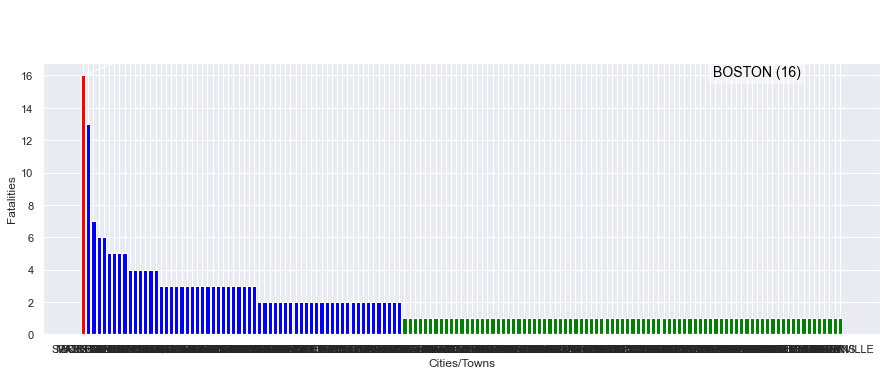

In [2561]:
#graphing city/town with highest fatalities
ct_counts = Dfatalities['CITY_TOWN'].value_counts()
max_value = np.max(ct_counts.values)
min_value = np.min(ct_counts.values)
fig, ax = plt.subplots(figsize=(15, 5))

for i, value in enumerate(ct_counts.values):
    color = "blue"
    if value == max_value:
        color = "red"
    elif value == min_value:
        color = "green"
    ax.bar(ct_counts.index[i], value, color=color)

ax.set_xticks(ct_counts.index)
ax.set_xlabel("Cities/Towns")
ax.set_ylabel("Fatalities")
# geting the name of the city/town with the highest fatalities
max_ct = ct_counts.idxmax()

#adding annotation to the plot
ax.annotate(f"{max_ct} ({max_value})", xy=(max_ct, max_value), xycoords='data',
            xytext=(0.8, 0.95), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=0.2"),
            fontsize=14, color='black',
            bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.5))
plt.show()

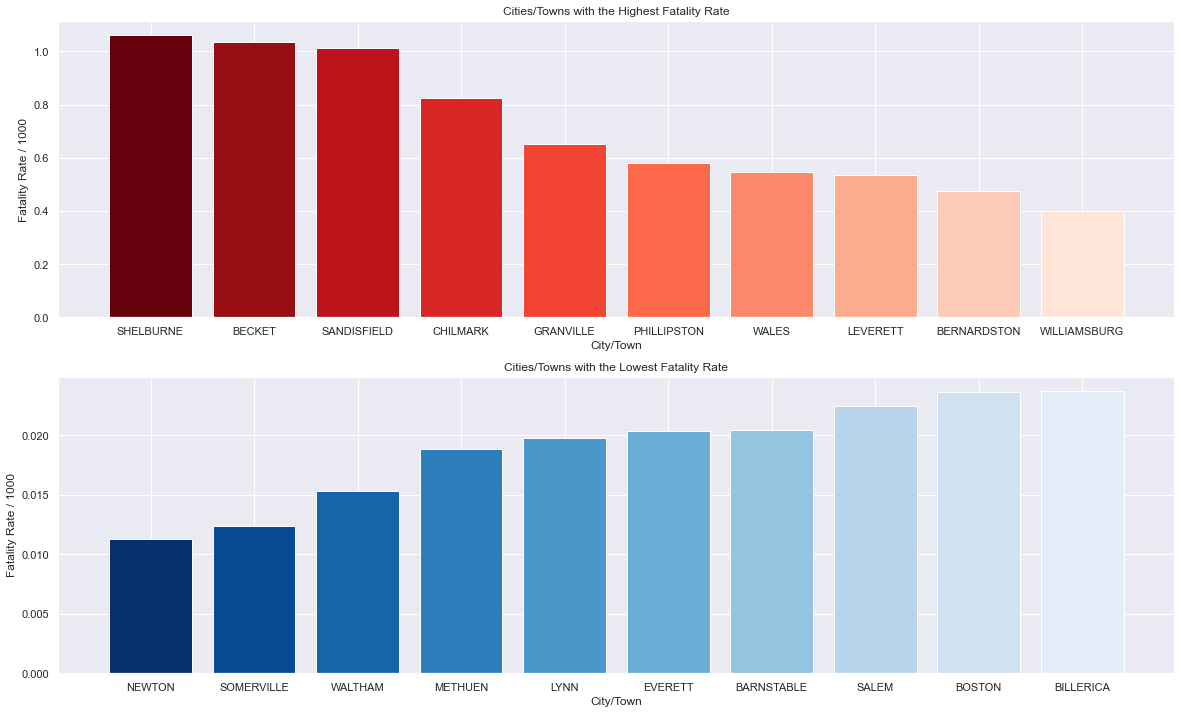

In [2562]:
#graphing the top and bottom 10 cities and towns ranked by death rate
ct_counts = Dfatalities['CITY_TOWN'].value_counts()

# calculate the normalized fatalities by dividing the number of fatalities by the population
ct_pop = Dfatalities.groupby('CITY_TOWN').sum()['POP']
ct_norm = ct_counts*1000 / (ct_pop/Dfatalities.groupby('CITY_TOWN').count()['POP'])


top_10 = ct_norm.sort_values(ascending=False).head(10)
bot_10 = ct_norm.sort_values().head(10)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 12))

# plot top 10
for i, value in enumerate(top_10.values):
    ax1.bar(top_10.index[i], value, color=plt.cm.Reds(1-i/len(top_10.values)))
ax1.set_xticks(top_10.index)
ax1.set_title("Cities/Towns with the Highest Fatality Rate")
ax1.set_xlabel("City/Town")
ax1.set_ylabel("Fatality Rate / 1000")

# plot bottom 10
for i, value in enumerate(bot_10.values):
    ax2.bar(bot_10.index[i], value, color=plt.cm.Blues(1 - i/len(bot_10.values)))
ax2.set_xticks(bot_10.index)
ax2.set_title("Cities/Towns with the Lowest Fatality Rate")
ax2.set_xlabel("City/Town")
ax2.set_ylabel("Fatality Rate / 1000")

plt.show()

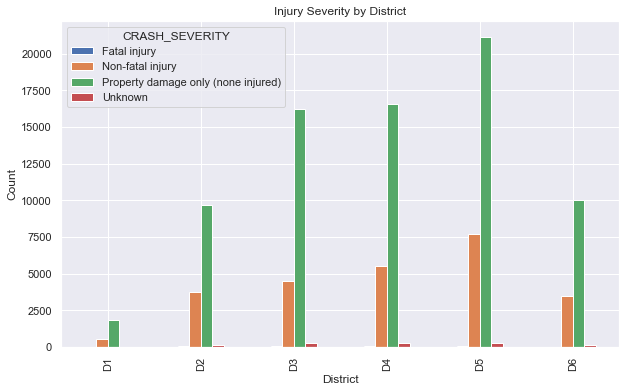

In [2563]:
#plotting adistrict crash severities
dseverity_counts = mac_df.groupby(['DISTRICT', 'CRASH_SEVERITY']).size().reset_index(name='count')
dseverity_per_district = dseverity_counts.pivot(index='DISTRICT', columns='CRASH_SEVERITY', values='count')
dseverity_per_district = dseverity_per_district.reset_index()
dseverity_per_district = dseverity_per_district.set_index('DISTRICT')
ax = dseverity_per_district.plot.bar(stacked=False, figsize=(10,6))

ax.set_title('Injury Severity by District')
ax.set_ylabel('Count')
ax.set_xlabel('District')
plt.show()

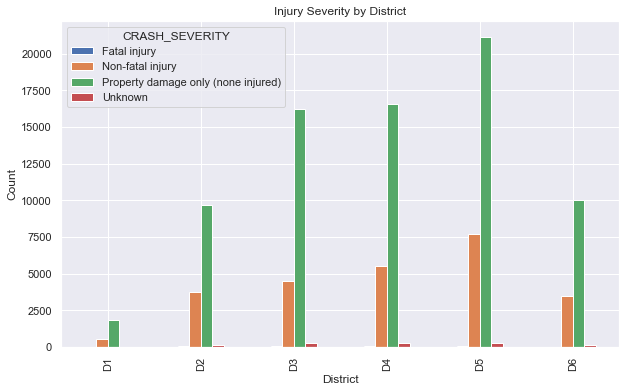

In [2564]:
#plotting adistrict crash severities
dseverity_counts = mac_df.groupby(['DISTRICT', 'CRASH_SEVERITY']).size().reset_index(name='count')
dseverity_per_district = dseverity_counts.pivot(index='DISTRICT', columns='CRASH_SEVERITY', values='count')
dseverity_per_district = dseverity_per_district.reset_index()
dseverity_per_district = dseverity_per_district.set_index('DISTRICT')
ax = dseverity_per_district.plot.bar(stacked=False, figsize=(10,6))

ax.set_title('Injury Severity by District')
ax.set_ylabel('Count')
ax.set_xlabel('District')
plt.show()

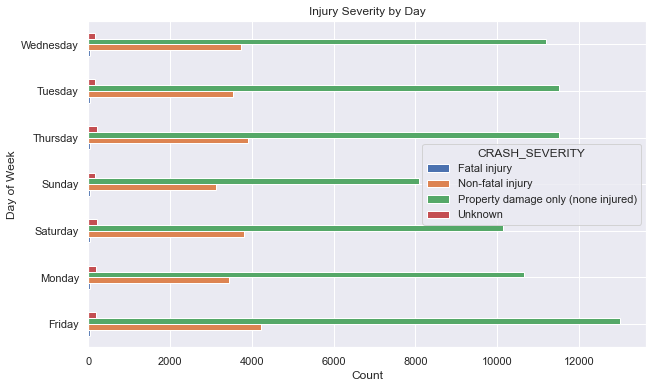

In [2565]:
#plotting day of week crash severities
sev_day = mac_df.groupby(['day_of_week', 'CRASH_SEVERITY']).size().reset_index(name='count')
sev_day = sev_day.pivot(index='day_of_week', columns='CRASH_SEVERITY', values='count')
sev_day = sev_day.reset_index()
sev_day = sev_day.set_index('day_of_week')
ax = sev_day.plot.barh(stacked=False, figsize=(10,6))

ax.set_title('Injury Severity by Day')
ax.set_xlabel('Count')
ax.set_ylabel('Day of Week')
plt.show()

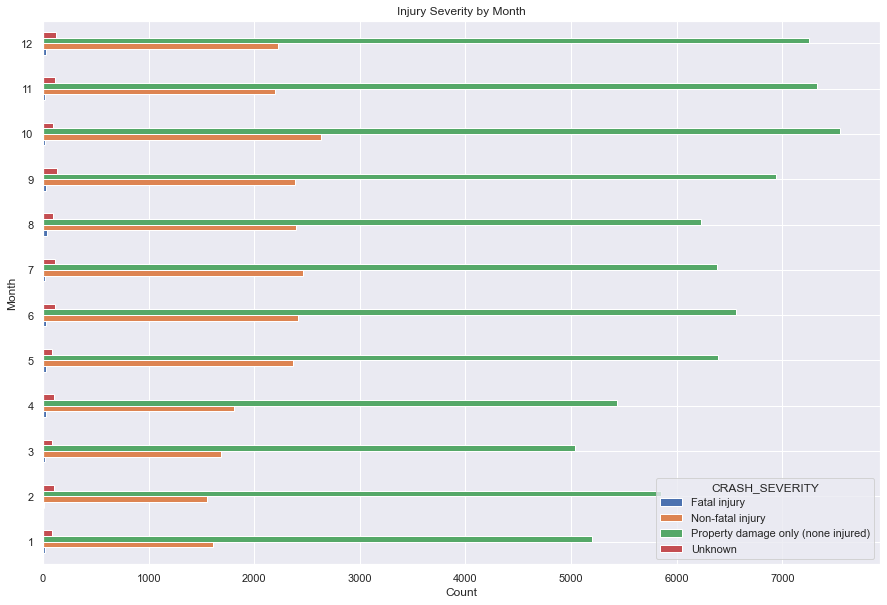

In [2566]:
#plotting crash severity per month
sev_month = mac_df.groupby(['MONTH', 'CRASH_SEVERITY']).size().reset_index(name='count')
sev_month = sev_month.pivot(index='MONTH', columns='CRASH_SEVERITY', values='count')
sev_month = sev_month.reset_index()
sev_month = sev_month.set_index('MONTH')
ax = sev_month.plot.barh(stacked=False, figsize=(15,10))
ax.set_title('Injury Severity by Month')
ax.set_xlabel('Count')
ax.set_ylabel('Month')
plt.show()

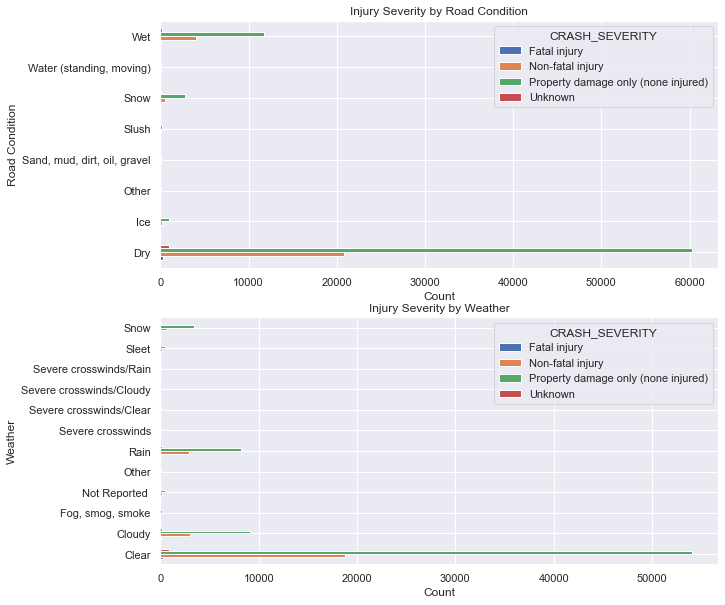

In [2567]:
#plotting injury severity to check for road condition and weather
sev_road= mac_df.groupby(['ROAD_COND', 'CRASH_SEVERITY']).size().reset_index(name='count')
sev_road= sev_road.pivot(index='ROAD_COND', columns='CRASH_SEVERITY', values='count')

sev_road= sev_road.reset_index()
sev_road= sev_road.set_index('ROAD_COND')

fig, ax= plt.subplots(2, 1, figsize=(10, 10))
sev_road.plot.barh(ax=ax[0], stacked=False)
ax[0].set_title('Injury Severity by Road Condition')
ax[0].set_xlabel('Count')
ax[0].set_ylabel('Road Condition')

sev_weather= mac_df.groupby(['WEATHER', 'CRASH_SEVERITY']).size().reset_index(name='count')
sev_weather= sev_weather.pivot(index='WEATHER', columns='CRASH_SEVERITY', values='count')

sev_weather= sev_weather.reset_index()
sev_weather= sev_weather.set_index('WEATHER')
sev_weather.plot.barh(ax=ax[1], stacked=False)
ax[1].set_title('Injury Severity by Weather')
ax[1].set_xlabel('Count')
ax[1].set_ylabel('Weather')
plt.show()

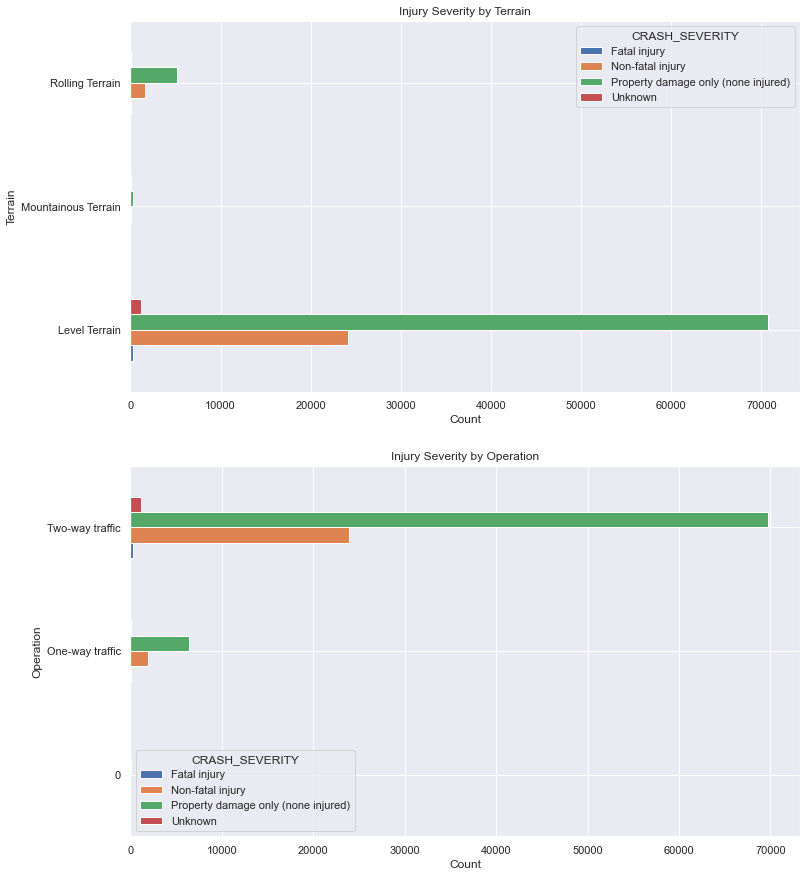

In [2568]:
#plotting injury severity for terrain and operation
sev_terr= mac_df.groupby(['TERRAIN', 'CRASH_SEVERITY']).size().reset_index(name='count')
sev_terr= sev_terr.pivot(index='TERRAIN', columns='CRASH_SEVERITY', values='count')

sev_terr= sev_terr.reset_index()
sev_terr= sev_terr.set_index('TERRAIN')

fig, ax= plt.subplots(2, 1, figsize=(12, 15))
sev_terr.plot.barh(ax=ax[0], stacked=False)
ax[0].set_title('Injury Severity by Terrain')
ax[0].set_xlabel('Count')
ax[0].set_ylabel('Terrain')

sev_op= mac_df.groupby(['OPERATION', 'CRASH_SEVERITY']).size().reset_index(name='count')
sev_op= sev_op.pivot(index='OPERATION', columns='CRASH_SEVERITY', values='count')

sev_op= sev_op.reset_index()
sev_op= sev_op.set_index('OPERATION')
sev_op.plot.barh(ax=ax[1], stacked=False)
ax[1].set_title('Injury Severity by Operation')
ax[1].set_xlabel('Count')
ax[1].set_ylabel('Operation')
plt.show()

<font size="8">Creating Injury DF to run through a ML model</font>

In [2569]:
special=mac_df['CRASH_SEVERITY'].value_counts()
print(special)

Property damage only (none injured)    76149
Non-fatal injury                       25747
Unknown                                 1249
Fatal injury                             296
Name: CRASH_SEVERITY, dtype: int64


In [2570]:
#copyign df
INJ = mac_df.copy()

#changing name
INJ['CRASH_SEVERITY'] = INJ['CRASH_SEVERITY'].replace('Property damage only (none injured)', 'Property damage')

In [2571]:
#dropping unknown calues from the crash severity
INJ=INJ.drop(INJ[INJ['CRASH_SEVERITY']=='Unknown'].index)

#merging the injury rows and naming them personal injury
INJ.loc[INJ['CRASH_SEVERITY'] == 'Non-fatal injury', 'CRASH_SEVERITY'] = 'Personal injury'
INJ.loc[INJ['CRASH_SEVERITY'] == 'Fatal injury', 'CRASH_SEVERITY'] = 'Personal injury'

#dropping columns that i have converted or broken up with date time
INJ=INJ.drop(['CRASH_TIME','D_POP','CRASH_DATETIME','YEAR','CIRCUMSTANCES','FIRST_HRMF_EVENT','MOST_HRMFL_EVT_CL','CRASH_NUMB','CITY_TOWN','POP','INJ_SVRTY',
              'X','Y',"AGE_YOUNG",'AGE_OLD','OPERATION'], axis=1) #dropping operation because i ran the model without it, and there were no changes

In [2572]:
special=INJ['AMB_LIGHT'].value_counts()
print(special)

Daylight                           70225
Dark - lighted roadway             21008
Dark - roadway not lighted          5805
Dusk                                2896
Dawn                                1563
Dark - unknown roadway lighting      546
Other                                 89
Unknown                               53
Not reported                           7
Name: AMB_LIGHT, dtype: int64


In [2573]:
#dropping values from Amb light
INJ=INJ.drop(INJ[INJ['AMB_LIGHT']==('Unknown','Not reported','Other')].index)

In [2574]:
special=INJ['WEATHER'].value_counts()
print(special)

Clear                       73047
Cloudy                      12144
Rain                        11157
Snow                         4095
Sleet                         627
Not Reported                  596
Fog, smog, smoke              298
Severe crosswinds/Rain        144
Severe crosswinds/Clear        26
Severe crosswinds              24
Other                          23
Severe crosswinds/Cloudy       11
Name: WEATHER, dtype: int64


In [2575]:
#dropping values from weather
INJ=INJ.drop(INJ[INJ['WEATHER']==('Not reported','Other')].index)

In [2576]:
special=INJ['ROAD_COND'].value_counts()
print(special)

Dry                             81331
Wet                             15850
Snow                             3238
Ice                              1136
Slush                             263
Sand, mud, dirt, oil, gravel      165
Water (standing, moving)          164
Other                              45
Name: ROAD_COND, dtype: int64


In [2577]:
#dropping values from weather
INJ=INJ.drop(INJ[INJ['ROAD_COND']==('Other')].index)

In [2578]:
special=INJ['STREET'].value_counts()
print(special)

MAIN STREET                5275
WASHINGTON STREET          2116
MASSACHUSETTS TURNPIKE     1969
INTERSTATE 495             1451
YANKEE DIVISION HIGHWAY    1333
                           ... 
KERNWOOD AVENUE               1
BLUEFIELD STREET              1
WAYSIDE AVENUE                1
DALESSANDRO AVENUE            1
ADELAIDE STREET               1
Name: STREET, Length: 8350, dtype: int64


In [2579]:
#replacing all non MAIN STREET to other street
def replace_street(street):
    if "STREET" in street and street !='MAIN STREET':
        return "OTHER STREET"
    else:
        return street
INJ['STREET']=INJ['STREET'].apply(replace_street)

In [2580]:
special=INJ['STREET'].value_counts()
print(special)

OTHER STREET                  46776
MAIN STREET                    5275
MASSACHUSETTS TURNPIKE         1969
INTERSTATE 495                 1451
YANKEE DIVISION HIGHWAY        1333
                              ...  
BANCROFT AVENUE                   1
RAMP-RT 128 SB TO RT 1A NB        1
FARRINGTON AVENUE                 1
LOCKE DRIVE                       1
DUNHAMTOWN BRIMFIELD ROAD         1
Name: STREET, Length: 5816, dtype: int64


In [2581]:
#replacing all avenue to AVENUES
def replace_avenue(ave):
    if "AVENUE" in ave:
        return "AVENUE"
    else:
        return ave
INJ['STREET']=INJ['STREET'].apply(replace_avenue)

In [2582]:
special=INJ['STREET'].value_counts()
print(special)

OTHER STREET                 46776
AVENUE                        9053
MAIN STREET                   5275
MASSACHUSETTS TURNPIKE        1969
INTERSTATE 495                1451
                             ...  
RAMP-RT 128 SB TO RT 35          1
KIAHS WAY                        1
RAMP-RT 6 EB TO RT 130           1
BAYVIEW ROAD                     1
DUNHAMTOWN BRIMFIELD ROAD        1
Name: STREET, Length: 4818, dtype: int64


In [2583]:
#replacing all roads to RAOD
def replace_road(road):
    if "ROAD" in road:
        return "ROAD"
    else:
        return road
INJ['STREET']=INJ['STREET'].apply(replace_road)

In [2584]:
special=INJ['STREET'].value_counts()
print(special)

OTHER STREET                  46776
ROAD                          15618
AVENUE                         9053
MAIN STREET                    5275
MASSACHUSETTS TURNPIKE         1969
                              ...  
WASHINGTON TERRACE                1
RAMP-RT 290 WB TO RT 12 NB        1
WORCESTER LANE                    1
SAN SOUCI DRIVE                   1
EDEN TRAIL                        1
Name: STREET, Length: 2466, dtype: int64


In [2585]:
#replacing all lane, terrace, and drive
def replace_road(road):
    if "ROAD" in road:
        return "ROAD"
    elif "TERRACE" in road:
        return "TERRACE"
    elif "LANE" in road:
        return "LANE"
    elif "DRIVE" in road:
        return "DRIVE"
    elif "WAY" in road:
        return "WAY"
    elif "CIRCLE" in road:
        return "CIRCLE"
    elif "PLACE" in road:
        return "PLACE"
    elif "WAY" in road:
        return "WAY"
    elif "TRAIL" in road:
        return "TRAIL"
    elif "COURT" in road:
        return "COURT"
    elif "BOULEVARD" in road:
        return "BOULEVARD"
    elif "ROTARY" in road:
        return "ROTARY"
    elif "TURNPIKE" in road:
        return "TURNPIKE"
    elif "INTERSTATE" in road:
        return "INTERSTATE"
    elif "ROUTE" in road:
        return "ROUTE"
    elif "BRIDGE" in road:
        return "BRIDGE"
    elif "SQUARE" in road:
        return "STREET"
    elif "RAMP" in road:
        return "RAMP"
    elif "PIKE" in road:
        return "TURNPIKE"
    elif any(x in road for x in ["PATH", "TRAIL", "DAM", "ROW", "PARK", "OVERPASS"]):
        return "OTHER"
    else:
        return road
INJ['STREET']=INJ['STREET'].apply(replace_road)

In [2586]:
special=INJ['SPEED_LIMIT'].value_counts()
print(special)

30    33690
25    17426
35    16794
40     8770
65     6133
55     4999
45     4546
50     2704
20     2696
10     1390
15     1274
5      1123
60      399
1       152
0        18
24        7
34        3
26        3
6         3
32        2
3         2
33        2
23        2
56        1
64        1
44        1
29        1
39        1
54        1
21        1
36        1
2         1
Name: SPEED_LIMIT, dtype: int64


In [2587]:
# Convert the "SPEED_LIMIT" column to an object data type
INJ['SPEED_LIMIT'] = INJ['SPEED_LIMIT'].astype(str)

# Replace all values less than 10 with 10
INJ.loc[INJ['SPEED_LIMIT'].astype(int) < 10, 'SPEED_LIMIT'] = '<10'

# Filter out rows with a value of 0
INJ = INJ[INJ['SPEED_LIMIT'] != '0']

In [2588]:
# Get the value counts for each unique value in the "SPEED_LIMIT" column
value_counts = INJ['SPEED_LIMIT'].value_counts()

# Get a list of values with count >= 10
valid_values = value_counts[value_counts >= 10].index.tolist()

# Filter out values with count < 10 using boolean indexing
INJ = INJ[INJ['SPEED_LIMIT'].isin(valid_values)]

In [2589]:
# Select rows with non-null values in CRASH_SEVERITY and null values in DISTRICT
filtered_df = INJ[(INJ['CRASH_SEVERITY'].notnull()) & (INJ['DISTRICT'].isnull())]


In [2590]:
filtered_df

,CRASH_SEVERITY,COLL_TYPE,AMB_LIGHT,WEATHER,ROAD_COND,SPEED_LIMIT,STREET,TERRAIN,DISTRICT,MONTH,day_of_week,hour_of_day
416,Property damage,Single vehicle crash,Dawn,Cloudy,Dry,40,ROAD,Level Terrain,NaN,1,Wednesday,6
551,Property damage,"Sideswipe, same direction",Dark - roadway not lighted,Cloudy,Dry,65,WAY,Level Terrain,NaN,1,Tuesday,20
1432,Personal injury,Angle,Daylight,Clear,Dry,40,OTHER,Level Terrain,NaN,1,Wednesday,13
1433,Property damage,Single vehicle crash,Dark - lighted roadway,Clear,Dry,35,OTHER,Level Terrain,NaN,1,Saturday,21
1434,Property damage,Single vehicle crash,Daylight,Clear,Dry,30,OTHER,Level Terrain,NaN,1,Saturday,15
...,...,...,...,...,...,...,...,...,...,...,...,...
116837,Personal injury,Single vehicle crash,Dark - lighted roadway,Clear,Dry,40,OTHER,Level Terrain,NaN,12,Tuesday,23
116926,Property damage,"Sideswipe, same direction",Dusk,Cloudy,Dry,65,WAY,Level Terrain,NaN,12,Friday,17
117638,Property damage,Rear-end,Daylight,Clear,Dry,35,WAY,Level Terrain,NaN,12,Friday,6
118016,Property damage,Single vehicle crash,Dark - roadway not lighted,Clear,Wet,30,RAMP,Level Terrain,NaN,12,Saturday,2


In [2591]:
# Group the data by CRASH_SEVERITY and count the number of occurrences
crash_count = filtered_df.groupby('CRASH_SEVERITY').size()

# Print the count
print(crash_count)

# Group the data by CRASH_SEVERITY and count the number of occurrences
c_count = INJ.groupby('CRASH_SEVERITY').size()

# Print the count
print(c_count)

#safe to drop NaN values of DISTRICT as it's almost the same proportion of data lost. 30 vs 34%

CRASH_SEVERITY
Personal injury    189
Property damage    623
dtype: int64
CRASH_SEVERITY
Personal injury    26022
Property damage    76098
dtype: int64


In [2592]:
# Drop all rows with NaN values in the DISTRICT column
INJ = INJ.dropna(subset=['DISTRICT'])

In [2593]:
INJ.dtypes

CRASH_SEVERITY    object
COLL_TYPE         object
AMB_LIGHT         object
WEATHER           object
ROAD_COND         object
SPEED_LIMIT       object
STREET            object
TERRAIN           object
DISTRICT          object
MONTH              int64
day_of_week       object
hour_of_day        int64
dtype: object

In [2594]:
#changing datatype of speed limit from float to int 
INJ=INJ.astype({'MONTH':'object','hour_of_day':'object'})

#checking changes made
print(INJ.dtypes)

CRASH_SEVERITY    object
COLL_TYPE         object
AMB_LIGHT         object
WEATHER           object
ROAD_COND         object
SPEED_LIMIT       object
STREET            object
TERRAIN           object
DISTRICT          object
MONTH             object
day_of_week       object
hour_of_day       object
dtype: object


In [2595]:
#looking at nulls values in each column
INJ.isnull().sum()

CRASH_SEVERITY    0
COLL_TYPE         0
AMB_LIGHT         0
WEATHER           0
ROAD_COND         0
SPEED_LIMIT       0
STREET            0
TERRAIN           0
DISTRICT          0
MONTH             0
day_of_week       0
hour_of_day       0
dtype: int64

In [2596]:
#this is a binary classification problem as i am trying to predict the crash severity column, which only has 2 values, thus decisiontreeclassifier should be used

In [2597]:
#checking the unique values in each column to assess if OHE makes sense since OHE leads to a large number of new features, leading to a more complex and model that is
#hader to train. 
INJ.nunique()

CRASH_SEVERITY     2
COLL_TYPE         12
AMB_LIGHT          9
WEATHER           12
ROAD_COND          7
SPEED_LIMIT       13
STREET            18
TERRAIN            3
DISTRICT           6
MONTH             12
day_of_week        7
hour_of_day       24
dtype: int64

In [ ]:
#creating my decision tree values. x being the model, y being the target variable. then creating a 70/30 train/test dataset while ensuring 
#the sets are created randomly as well as ensure normalized data of the target variable in both
X = INJ.drop('CRASH_SEVERITY', axis=1)
y = INJ['CRASH_SEVERITY']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

#encoding all my data using OHE since it his nominal data
ohe = OneHotEncoder()
X_train_ohe = ohe.fit_transform(X_train)
X_test_ohe = ohe.transform(X_test)

#training my decision tree
dtc = DecisionTreeClassifier(random_state=42)
#pre-pruning with hyperparameters
hyperparameters = {'max_depth': [3, 4, 5, 6, 7],
                   'min_samples_split': [2, 4, 6, 8, 10],
                  'ccp_alpha': [0.0, 0.001, 0.01, 0.1, 1.0]}

#performing grid search with cross-validation to get the best hyperparameters
grid = GridSearchCV(dtc, hyperparameters, cv=5)
grid.fit(X_train_ohe, y_train)

#showing the best hyperparameters and score
print('Best hyperparameters:', grid.best_params_)
print('Best score:', grid.best_score_)

#putting the parameters and score found back into the decision tree
dtc = DecisionTreeClassifier(max_depth=grid.best_params_['max_depth'],
                             min_samples_split=grid.best_params_['min_samples_split'],
                             ccp_alpha=grid.best_params_['ccp_alpha'],
                             random_state=42)

Accuracy: 0.746685091961965
                 precision    recall  f1-score   support

Personal injury       0.54      0.05      0.09      7750
Property damage       0.75      0.99      0.85     22643

       accuracy                           0.75     30393
      macro avg       0.64      0.52      0.47     30393
   weighted avg       0.70      0.75      0.66     30393

Confusion matrix:
[[  386  7364]
 [  335 22308]]


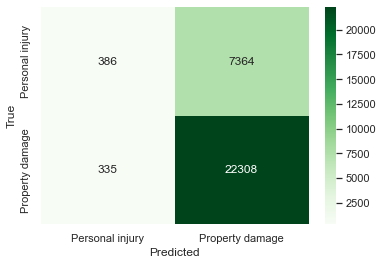

In [2599]:
#putting model into the training data
dtc.fit(X_train_ohe, y_train)

#running the test data through it to assess accuracy
accuracy = dtc.score(X_test_ohe, y_test)
print('Accuracy:', accuracy)

y_pred = dtc.predict(X_test_ohe) #making predictions on the testing set

#getting classification report
print(classification_report(y_test, y_pred))

#confusion matrix so i can understand the type of errors that are occuring in this model
matrix=confusion_matrix(y_test, y_pred)
print('Confusion matrix:')
print(matrix)

#creating class labels
class_labels = ['Personal injury', 'Property damage']

# Plot the confusion matrix as a heatmap
sns.heatmap(matrix, annot=True, cmap='Greens', fmt='g', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

/Users/assistant/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


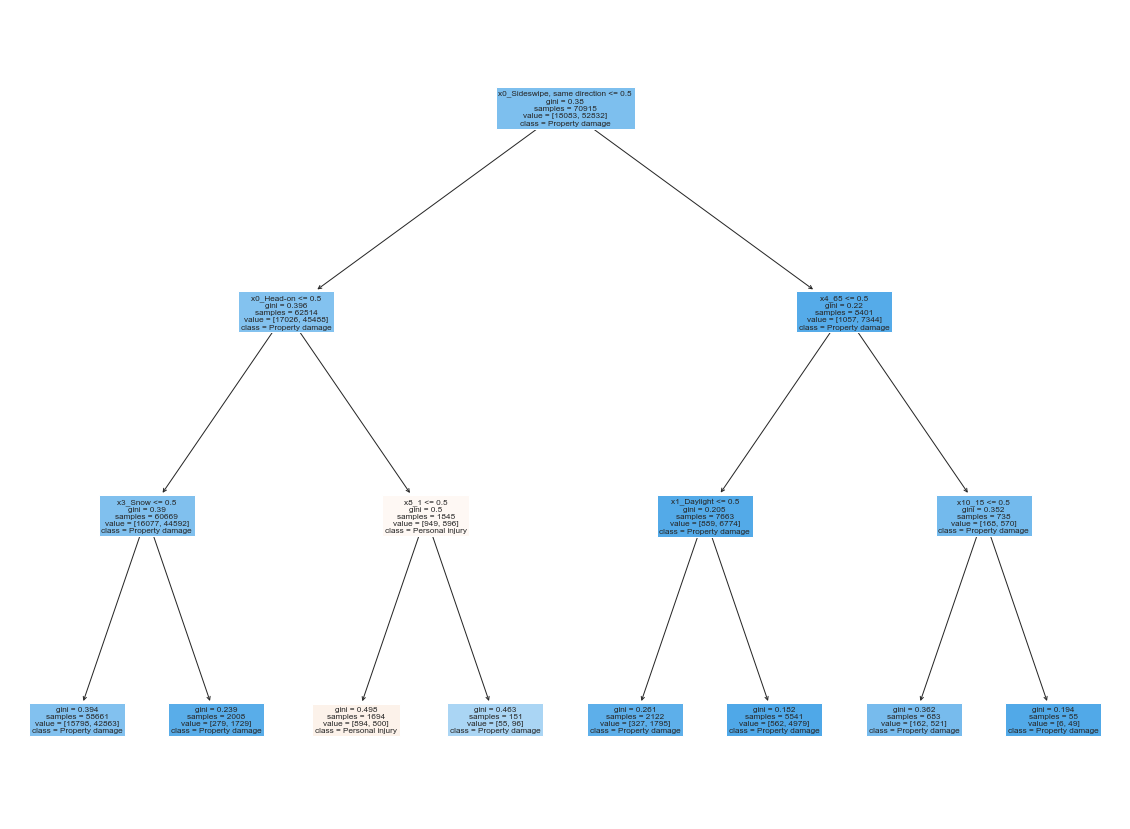

In [2600]:
#plotting decision tree
plt.figure(figsize=(20,15))
plot_tree(dtc, filled=True, feature_names=ohe.get_feature_names(), class_names=dtc.classes_)
plt.show()

<font size="5">Recreating the same model, but using RFE (recursive feature elim) instead of Gridsearch as RFE is more efficient in terms of computational power required. </font>

Accuracy: 0.7467508965880302
                 precision    recall  f1-score   support

Personal injury       0.54      0.05      0.09      7750
Property damage       0.75      0.98      0.85     22643

       accuracy                           0.75     30393
      macro avg       0.64      0.52      0.47     30393
   weighted avg       0.70      0.75      0.66     30393

Confusion matrix:
[[  394  7356]
 [  341 22302]]


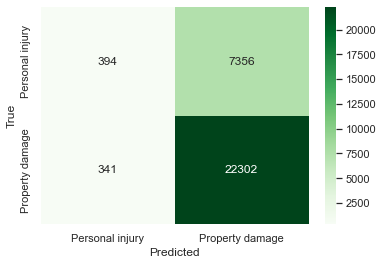

/Users/assistant/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


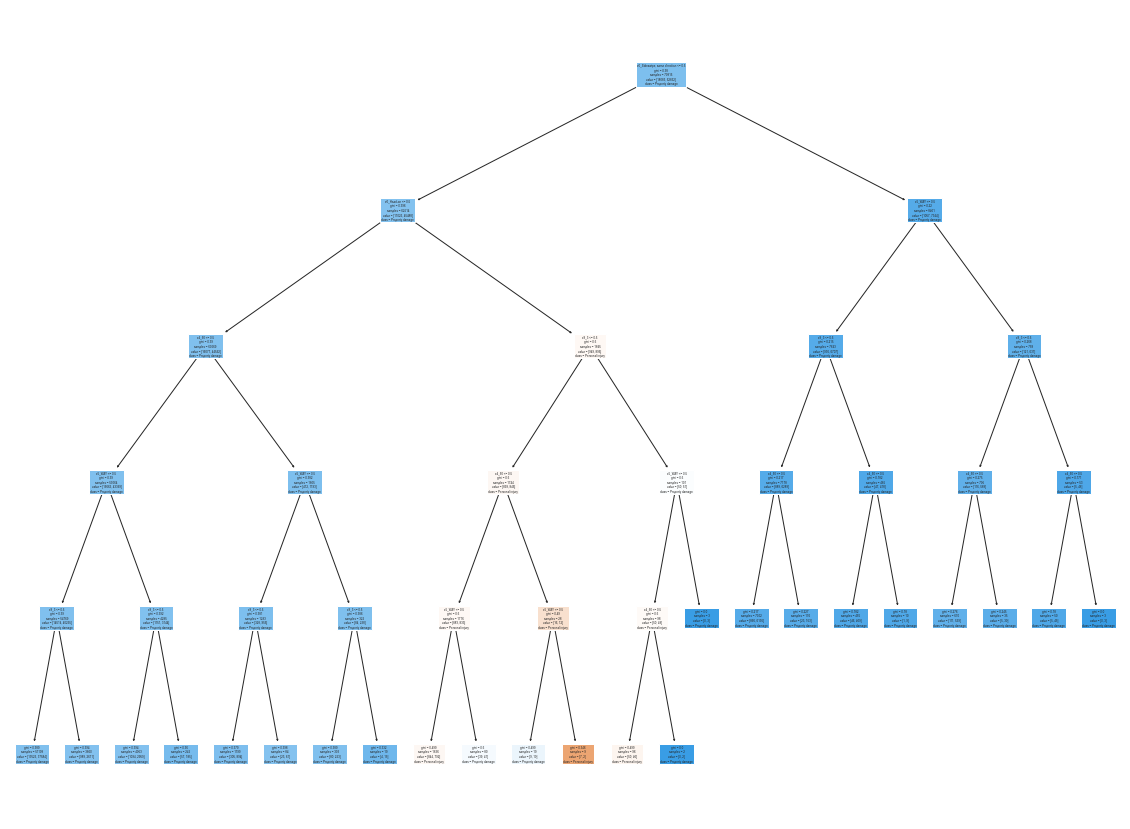

In [2601]:
#making training and test sets
X = INJ.drop('CRASH_SEVERITY', axis=1)
y = INJ['CRASH_SEVERITY']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

#encoding with OHE
ohe = OneHotEncoder()
X_train_ohe = ohe.fit_transform(X_train)
X_test_ohe = ohe.transform(X_test)

#using rfe
dtc = DecisionTreeClassifier(random_state=42)
rfe = RFE(estimator=dtc, n_features_to_select=5, step=1)
X_train_rfe = rfe.fit_transform(X_train_ohe, y_train)
X_test_rfe = rfe.transform(X_test_ohe)

#training model after RFE
dtc.fit(X_train_rfe, y_train)

#checking accuracy
accuracy = dtc.score(X_test_rfe, y_test)
print('Accuracy:', accuracy)

y_pred = dtc.predict(X_test_rfe)

#classification and confusion matrix
print(classification_report(y_test, y_pred))

matrix=confusion_matrix(y_test, y_pred)
print('Confusion matrix:')
print(matrix)

#creating class labels
class_labels = ['Personal injury', 'Property damage']

#using sns to plot matrix
sns.heatmap(matrix, annot=True, cmap='Greens', fmt='g',xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#plotting tree
plt.figure(figsize=(20,15))
plot_tree(dtc, filled=True, feature_names=ohe.get_feature_names()[rfe.get_support()], class_names=dtc.classes_)
plt.show()

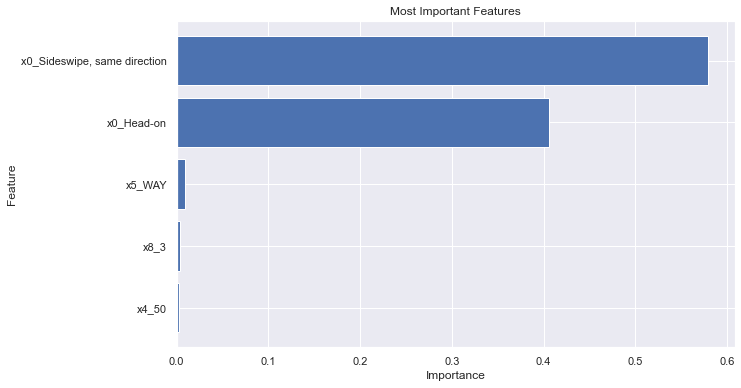

In [2602]:
#plotting top 10 features
#getting features
importances= dtc.feature_importances_

#getting names of the features
feature_names= ohe.get_feature_names()[rfe.get_support()]

#creating dictionary
importance_dict= dict(zip(feature_names, importances))

#sorting by order of importance
top_features= sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)[:10]

#making two lists with feature names and importances
top_feature_names= [feature[0] for feature in top_features]
top_feature_importances= [feature[1] for feature in top_features]

#plotting top 10 most important features
fig, ax = plt.subplots(figsize=(10,6))
ax.barh(top_feature_names, top_feature_importances)
#inverting so the highest is at the top
ax.invert_yaxis() 
ax.set_xlabel("Importance")
ax.set_ylabel("Feature")
ax.set_title("Most Important Features")
plt.show()

/Users/assistant/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


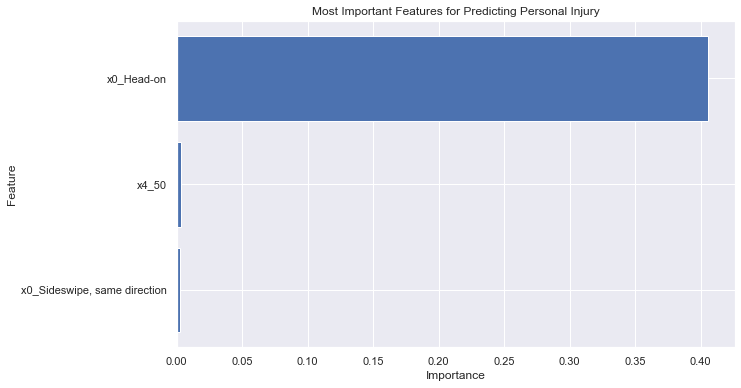

In [2603]:
#getting the index of the 'Personal Injury' class
class_index = np.where(dtc.classes_ == 'Personal injury')[0][0]

#getting the importances for that class
importances= dtc.feature_importances_[class_index::len(dtc.classes_)]

#getting names of the features
feature_names= ohe.get_feature_names()[rfe.get_support()]

#creating dictionary
importance_dict= dict(zip(feature_names, importances))

#sorting by order of importance
top_features= sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)[:10]

#making two lists with feature names and importances
top_feature_names= [feature[0] for feature in top_features]
top_feature_importances= [feature[1] for feature in top_features]

#plotting top 10 most important features
fig, ax = plt.subplots(figsize=(10,6))
ax.barh(top_feature_names, top_feature_importances)
#inverting so the highest is at the top
ax.invert_yaxis() 
ax.set_xlabel("Importance")
ax.set_ylabel("Feature")
ax.set_title("Most Important Features for Predicting Personal Injury")
plt.show()

<font size="5">Recreating the same mode, but using model based feature selection (LassoCV) method, instead of gridsearch or RFE since data is OHE and lasso
    is more appropriate because it is a linear model. Lasso reduces the numbers of features in the model since it produces sparse solutions, and has built
    in features that do well handling high dimensional data. </font>

In [2608]:
'''# Split the data into training and test sets
X = INJ.drop('CRASH_SEVERITY', axis=1)
y = INJ['CRASH_SEVERITY']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# One-hot encode the data
ohe = OneHotEncoder()
X_train_ohe = ohe.fit_transform(X_train)
X_test_ohe = ohe.transform(X_test)

# Use RFE for feature selection
dtc = DecisionTreeClassifier(random_state=42)
rfe = RFE(estimator=dtc, n_features_to_select=6, step=1)
X_train_rfe = rfe.fit_transform(X_train_ohe, y_train)
X_test_rfe = rfe.transform(X_test_ohe)

# Train the decision tree model with RFE-selected features
dtc.fit(X_train_rfe, y_train)

# Assess the accuracy of the model
accuracy = dtc.score(X_test_rfe, y_test)
print('Accuracy:', accuracy)

y_pred = dtc.predict(X_test_rfe)

# Get classification report and confusion matrix
print(classification_report(y_test, y_pred))

matrix=confusion_matrix(y_test, y_pred)
print('Confusion matrix:')
print(matrix)

# Plot the confusion matrix as a heatmap
sns.heatmap(matrix, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plot the decision tree
plt.figure(figsize=(20,15))
plot_tree(dtc, filled=True, feature_names=ohe.get_feature_names()[rfe.get_support()], class_names=dtc.classes_)
plt.show()'''

"# Split the data into training and test sets\nX = INJ.drop('CRASH_SEVERITY', axis=1)\ny = INJ['CRASH_SEVERITY']\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)\n\n# One-hot encode the data\nohe = OneHotEncoder()\nX_train_ohe = ohe.fit_transform(X_train)\nX_test_ohe = ohe.transform(X_test)\n\n# Use RFE for feature selection\ndtc = DecisionTreeClassifier(random_state=42)\nrfe = RFE(estimator=dtc, n_features_to_select=6, step=1)\nX_train_rfe = rfe.fit_transform(X_train_ohe, y_train)\nX_test_rfe = rfe.transform(X_test_ohe)\n\n# Train the decision tree model with RFE-selected features\ndtc.fit(X_train_rfe, y_train)\n\n# Assess the accuracy of the model\naccuracy = dtc.score(X_test_rfe, y_test)\nprint('Accuracy:', accuracy)\n\ny_pred = dtc.predict(X_test_rfe)\n\n# Get classification report and confusion matrix\nprint(classification_report(y_test, y_pred))\n\nmatrix=confusion_matrix(y_test, y_pred)\nprint('Confusion matrix:')\nprint(matr

Accuracy: 0.7468167012140954
                 precision    recall  f1-score   support

Personal injury       0.54      0.05      0.09      7750
Property damage       0.75      0.98      0.85     22643

       accuracy                           0.75     30393
      macro avg       0.64      0.52      0.47     30393
   weighted avg       0.70      0.75      0.66     30393

Confusion matrix:
[[  397  7353]
 [  342 22301]]


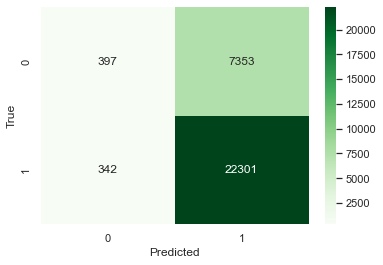

/Users/assistant/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


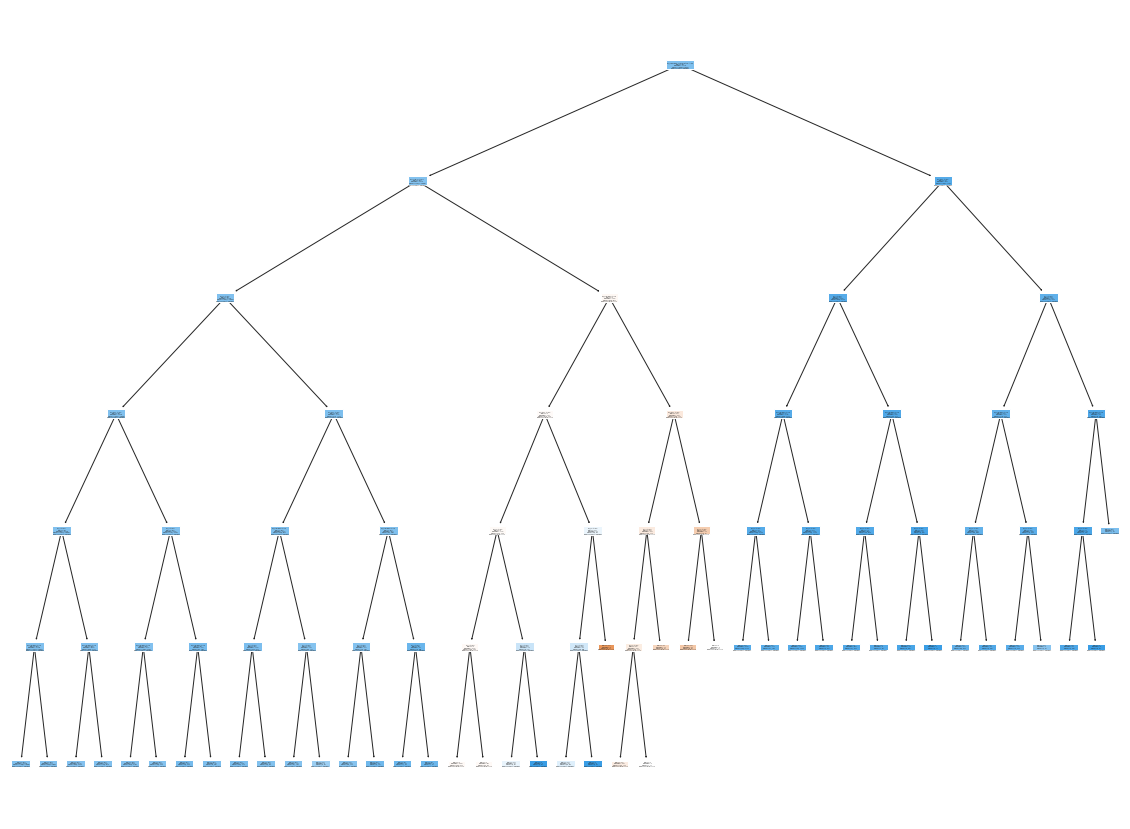

In [ ]:
# Remove TERRAIN column from the INJ dataframe
INJ = INJ.drop('TERRAIN', axis=1)

# Split the data into training and test sets
X = INJ.drop('CRASH_SEVERITY', axis=1)
y = INJ['CRASH_SEVERITY']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# One-hot encode the data
ohe = OneHotEncoder()
X_train_ohe = ohe.fit_transform(X_train)
X_test_ohe = ohe.transform(X_test)

# Use RFE for feature selection
dtc = DecisionTreeClassifier(random_state=42)
rfe = RFE(estimator=dtc, n_features_to_select=6, step=1)
X_train_rfe = rfe.fit_transform(X_train_ohe, y_train)
X_test_rfe = rfe.transform(X_test_ohe)

# Train the decision tree model with RFE-selected features
dtc.fit(X_train_rfe, y_train)

# Assess the accuracy of the model
accuracy = dtc.score(X_test_rfe, y_test)
print('Accuracy:', accuracy)

y_pred = dtc.predict(X_test_rfe)

# Get classification report and confusion matrix
print(classification_report(y_test, y_pred))

matrix=confusion_matrix(y_test, y_pred)
print('Confusion matrix:')
print(matrix)

# Plot the confusion matrix as a heatmap
sns.heatmap(matrix, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plot the decision tree
plt.figure(figsize=(20,15))
plot_tree(dtc, filled=True, feature_names=ohe.get_feature_names()[rfe.get_support()], class_names=dtc.classes_)
plt.show()


#all in one code block
#creating my decision tree values. x being the model, y being the target variable. then creating a 70/30 train/test dataset while ensuring 
#the sets are created randomly as well as ensure normalized data of the target variable in both
X = INJ.drop('CRASH_SEVERITY', axis=1)
y = INJ['CRASH_SEVERITY']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

#encoding all my data using OHE since it his nominal data
ohe = OneHotEncoder()
X_train_ohe = ohe.fit_transform(X_train)
X_test_ohe = ohe.transform(X_test)

#training my decision tree
dtc = DecisionTreeClassifier(random_state=42)
#pre-pruning with hyperparameters
hyperparameters = {'max_depth': [3, 4, 5, 6, 7],
                   'min_samples_split': [2, 4, 6, 8, 10],
                   'ccp_alpha': [0.0, 0.001, 0.01, 0.1, 1.0]}

#performing grid search with cross-validation to get the best hyperparameters
grid = GridSearchCV(dtc, hyperparameters, cv=5)
grid.fit(X_train_ohe, y_train)

#showing the best hyperparameters and score
print('Best hyperparameters:', grid.best_params_)
print('Best score:', grid.best_score_)

#putting the parameters and score found back into the decision tree
dtc = DecisionTreeClassifier(max_depth=grid.best_params_['max_depth'],
                             min_samples_split=grid.best_params_['min_samples_split'],
                             ccp_alpha=grid.best_params_['ccp_alpha'],
                             random_state=42)
                             
#putting model into the training data
dtc.fit(X_train_ohe, y_train)

#running the test data through it to assess accuracy
accuracy = dtc.score(X_test_ohe, y_test)
print('Accuracy:', accuracy)

y_pred = dtc.predict(X_test_ohe) #making predictions on the testing set

#getting classification report
print(classification_report(y_test, y_pred))

#confusion matrix so i can understand the type of errors that are occuring in this model
matrix=confusion_matrix(y_test, y_pred)
print('Confusion matrix:')
print(matrix)

# Plot the confusion matrix as a heatmap
sns.heatmap(matrix, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#plotting decision tree
plt.figure(figsize=(20,15))
plot_tree(dtc, filled=True, feature_names=ohe.get_feature_names(), class_names=dtc.classes_)
plt.show()

#testing code block to see if dropping diff columns changes anything

#running the same model, but removing collision type column to assess changes.
INJ=INJ.drop(['COLL_TYPE'], axis=1)
#all in one code block
#creating my decision tree values. x being the model, y being the target variable. then creating a 70/30 train/test dataset while ensuring 
#the sets are created randomly as well as ensure normalized data of the target variable in both
X = INJ.drop('CRASH_SEVERITY', axis=1)
y = INJ['CRASH_SEVERITY']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

#encoding all my data using OHE since it his nominal data
ohe = OneHotEncoder()
X_train_ohe = ohe.fit_transform(X_train)
X_test_ohe = ohe.transform(X_test)

#training my decision tree
dtc = DecisionTreeClassifier(random_state=42)
#pre-pruning with hyperparameters
hyperparameters = {'max_depth': [3, 4, 5, 6, 7],
                   'min_samples_split': [2, 4, 6, 8, 10],
                   'ccp_alpha': [0.0, 0.001, 0.01, 0.1, 1.0]}

#performing grid search with cross-validation to get the best hyperparameters
grid = GridSearchCV(dtc, hyperparameters, cv=5)
grid.fit(X_train_ohe, y_train)

#showing the best hyperparameters and score
print('Best hyperparameters:', grid.best_params_)
print('Best score:', grid.best_score_)

#putting the parameters and score found back into the decision tree
dtc = DecisionTreeClassifier(max_depth=grid.best_params_['max_depth'],
                             min_samples_split=grid.best_params_['min_samples_split'],
                             ccp_alpha=grid.best_params_['ccp_alpha'],
                             random_state=42)
                             
#putting model into the training data
dtc.fit(X_train_ohe, y_train)

#running the test data through it to assess accuracy
accuracy = dtc.score(X_test_ohe, y_test)
print('Accuracy:', accuracy)

y_pred = dtc.predict(X_test_ohe) #making predictions on the testing set

#getting classification report
print(classification_report(y_test, y_pred))

#confusion matrix so i can understand the type of errors that are occuring in this model
matrix=confusion_matrix(y_test, y_pred)
print('Confusion matrix:')
print(matrix)

# Plot the confusion matrix as a heatmap
sns.heatmap(matrix, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#plotting decision tree
plt.figure(figsize=(20,15))
plot_tree(dtc, filled=True, feature_names=ohe.get_feature_names(), class_names=dtc.classes_)
plt.show()